# Explore here

In [48]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Modelling
from sklearn.model_selection import train_test_split

# Selection boxes: ipywidgets as widgets
import ipywidgets as widgets
from IPython.display import display, HTML

# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Selection
from sklearn.feature_selection import SelectKBest, f_classif

In [49]:
# ===============================
# INPUT BOX - VARIABLES
# ===============================
font_size = "12px"   # Global font size
cell_width = "100px" # Width for all cells
cell_height = "30px" # Height for all cells
max_table_width = "90000px"  # Width of visible table area before horizontal scroll
# ===============================

# PATHS
input_path = "/workspaces/exploratory-data-analysis-project/data/raw/internal-link.csv"
output_path = "../data/processed/"

# AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
var_type_proposal_threshold = 1.00 # [%] Under this percentage of unique values, the attribute would be proposed as CATEGORIC

# PLOTS FOR VARIABLE ANALYSIS
figHeight_unit = 8 # Unitary figure height
figWidth_unit = 12 # Unitary figure width
num_cols = 2 # Number of columns per plot
my_palette = "pastel"
my_font_size = 15
num_values_to_plot = 40 # Max number of different values to plot (for CATEGORY_var)
num_bins = 100# Num of bins (for NUMERIC_var plots)

# OUTLIERS
low_outliers_threshold = 5.0   # [%] Max percentage of lower outliers allowed to remove
up_outliers_threshold = 5.0  # [% ]Max percentage of upper outliers allowed to remove

# MISSING VALUES
th_fill = 5.0   # [%] If missing perc > th_fill → fill by grouped median, otherwise drop rows

# SPLIT
my_test_size = 0.2
random_seed = 42

# FEATURE SELECTION
feature_keeping_threshold = 75 # [%] Percentaje of features to keep (SelectKBest) 

In [50]:
# STEP 1) EXPLORING THE DATAFRAME
print("STEP 1) EXPLORING THE DATAFRAME")

# Read DataFrame
df_raw=pd.read_csv(input_path)

# Copy  of previous DataFrame
df_S1 = df_raw.copy()

print(f"- ℹ️ Shape of the original DataFrame: {df_S1.shape}")

print("- ℹ️ Content of the original DataFrame:")
display(df_S1.head(5))

print("- ℹ️ Info of the original DataFrame (dataType and non-nul values):")
display(df_S1.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 2) FIND DUPLICATES
print("STEP 2) FIND DUPLICATES")

# Copy  of previous DataFrame
df_S2 = df_S1.copy()

num_duplicates=df_S2.duplicated().sum()
if num_duplicates == 0:
    df_S2=df_S2
    print("- ✅ Original DataFrame does not contain duplicates:")
else:
    df_S2_duplicates=df_S2[df_S2.duplicated()] #Works as bool mask
    df_S2=df_S2.drop_duplicates()
    print("- ⚠️ Original DataFrame contained " + str(num_duplicates) + " duplicates that have been dropped\n")

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING
print("STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING")

# Copy  of previous DataFrame
df_S3 = df_S2.copy()

# List of columns
columns = df_S3.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=f"col_{i}",
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DROP/KEEP ROW
# -------------------------------
keep_col_drop_down_cells = [widgets.Label(value="Keep col.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
keep_col = []
for i in range(len(columns)):
    drop = widgets.Dropdown(
        options=[True, False],
        value=True,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    keep_col_drop_down_cells.append(drop)
    keep_col.append(drop)
drop_row = widgets.HBox(keep_col_drop_down_cells)

# -------------------------------
# COL NAME ROW
# -------------------------------
col_name_cells = [widgets.Label(value="Col. name", layout=widgets.Layout(width=cell_width, height=cell_height))]
col_name = []
for i in range(len(columns)):
    text = widgets.Text(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    text.style = {'font_size': font_size}
    col_name.append(text)
    col_name_cells.append(text)
name_row = widgets.HBox(col_name_cells)

# -------------------------------
# TARGET ATTRIBUTE ROW
# -------------------------------
target_var_drop_down_cells = [widgets.Label(value="Is the target var.?", layout=widgets.Layout(width=cell_width, height=cell_height))]
target_var = []
for i in range(len(columns)):
    trget_var_drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    target_var_drop_down_cells.append(trget_var_drop)
    target_var.append(trget_var_drop)
target_var_row = widgets.HBox(target_var_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, drop_row, name_row, target_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)


STEP 1) EXPLORING THE DATAFRAME
- ℹ️ Shape of the original DataFrame: (48895, 16)
- ℹ️ Content of the original DataFrame:


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

- ℹ️ Info of the original DataFrame (dataType and non-nul values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews         

None

--------------------------------------------------------------
--------------------------------------------------------------

STEP 2) FIND DUPLICATES
- ✅ Original DataFrame does not contain duplicates:
--------------------------------------------------------------
--------------------------------------------------------------

STEP 3) SELECT RELEVANT ATTRIBUTES AND RENAME THEM FOR BETTER FITTING


In [51]:
# STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME
print("STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME")

# Copy  of previous DataFrame
df_S4 = df_S3.copy()

# List of columns
columns = df_S4.columns.tolist()

# Validate box inputs
for i in range(len(keep_col)):
    if  keep_col[i].value not in [True, False]:
        raise ValueError("- ❌ Missing Keep/Drop selection in column " + str(i))

for i in range(len(col_name)):
    if col_name[i].value.strip() == "":
        raise ValueError("- ❌ Empty column name found for column " + str(i))

for i in range(len(target_var)):
    if  target_var[i].value not in [True, False]:
        raise ValueError("- ❌ Missing target attribute selection in column " + str(i))
    
target_var_true_count = 0    
for i in range(len(target_var)):
    if target_var[i].value == True:
        target_var_true_count += 1
        if keep_col[i].value == False:
            raise ValueError("❌ Target attribute cannot be dropped!")
if target_var_true_count == 0:
    raise ValueError("❌ You must select exactly one target attribute (none selected)")
if target_var_true_count > 1:
    raise ValueError("❌ You must select exactly one target attribute (selected " + str(target_var_true_count) + ")")


print("- ✅ All selections, column names and target attribute validated successfully")

# Build KEEP bolean mask and rename dictionary
keep_mask = []
rename_dict = {}
for i in range(len(columns)):
    keep_mask.append(keep_col[i].value)
    rename_dict[columns[i]] = col_name[i].value

# Rename columns
df_S4 = df_S4.rename(columns=rename_dict)

# List of columns
columns = df_S4.columns.tolist()

# Select target attribute
for i in range(len(target_var)):
    if target_var[i].value == True:
        y_var = columns[i]
    
# Drop non-relevant columns
df_S4=df_S4.loc[:, keep_mask]

print("- ✅ Non-Relevant attributes have been dropped.")
print(f" - ℹ️ Original df's columns: {len(df_S3.columns)}")
print(f" - ℹ️ Cleaned df's  columns: {len(df_S4.columns)}")
print(f" - ℹ️ Final DataFrame shape: {df_S4.shape}")
display(df_S4.head())

# Count attributes
df_S4_summary = pd.DataFrame({
    "Column": df_S4.columns,
    "Unique_Count": df_S4.nunique().values
})
print(" - ℹ️ Final DataFrame unique attributes:")
display(df_S4_summary)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 5.1) AUTOMATIC PROPOSAL OF ATTRIBUTE'S DATA TYPE
print("STEP 5.1) PROPOSAL OF ATTRIBUTE'S DATA TYPE")

# Copy  of previous DataFrame
df_S5_1 = df_S4.copy()

# List of columns
columns = df_S5_1.columns.tolist()

# Iterate through columns
category_var_auto = []
numeric_var_auto = []
for col in df_S5_1.columns:
    col_data = df_S5_1[col].dropna()
    total_rows = len(df_S5_1)

    # Skip empty columns
    if total_rows == 0:
        continue
    
    # Define local variables for each loop
    unique_count = col_data.nunique()
    unique_ratio = unique_count / total_rows * 100
    col_dtype = str(df_S5_1[col].dtype)

    # Case 1: text-based columns
    if col_dtype in ["object", "category"]:
        category_var_auto.append(col)
        continue
    # Case 2: integer columns
    if col_dtype.startswith("int"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue
    # Case 3: float columns
    if col_dtype.startswith("float"):
        if unique_ratio <= var_type_proposal_threshold:
            category_var_auto.append(col)
        else:
            numeric_var_auto.append(col)
        continue

# Print proposed Data Types
print("- ℹ️ Proposed CATEGORY Attributes: " + str(category_var_auto))
print("- ℹ️ Proposed NUMERIC Attributes: " + str(numeric_var_auto))

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# DATA TYPE ROW
# -------------------------------
data_type_drop_down_cells = [widgets.Label(value="Data type:", layout=widgets.Layout(width=cell_width, height=cell_height))]
data_type = []
for i in range(len(columns)):
    if columns[i] in category_var_auto:
        data_type_value = "CATEGORY"
    else:
        data_type_value = "NUMERIC"
    data_type_drop = widgets.Dropdown(
        options=["CATEGORY", "NUMERIC"],
        value=data_type_value,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    data_type_drop_down_cells.append(data_type_drop)
    data_type.append(data_type_drop)
data_type_row = widgets.HBox(data_type_drop_down_cells)

# -------------------------------
# COMBINATION ATTRIBUTE FOR MULTIVARIANT ANALYSIS ROW
# -------------------------------
combi_var_drop_down_cells = [widgets.Label(value="Combination att.", layout=widgets.Layout(width=cell_width, height=cell_height))]
combi_var = []
for i in range(len(columns)):
    combi_var_drop = widgets.Dropdown(
        options=[True, False],
        value=False,
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'}
    )
    combi_var_drop_down_cells.append(combi_var_drop)
    combi_var.append(combi_var_drop)
combi_var_row = widgets.HBox(combi_var_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, data_type_row,combi_var_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

STEP 4) DROP  NON-RELEVANT ATTRIBUTES AND RENAME
- ✅ All selections, column names and target attribute validated successfully
- ✅ Non-Relevant attributes have been dropped.
 - ℹ️ Original df's columns: 16
 - ℹ️ Cleaned df's  columns: 10
 - ℹ️ Final DataFrame shape: (48895, 10)


area          hood  latitude  longitude             type  price  \
0   Brooklyn    Kensington  40.64749  -73.97237     Private room    149   
1  Manhattan       Midtown  40.75362  -73.98377  Entire home/apt    225   
2  Manhattan        Harlem  40.80902  -73.94190     Private room    150   
3   Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt     89   
4  Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt     80   

   min_nights  num_reviews  host_list_count  availability  
0           1            9                6           365  
1           1           45                2           355  
2           3            0                1           365  
3           1          270                1           194  
4          10            9                1             0

 - ℹ️ Final DataFrame unique attributes:


Column  Unique_Count
0             area             5
1             hood           221
2         latitude         19048
3        longitude         14718
4             type             3
5            price           674
6       min_nights           109
7      num_reviews           394
8  host_list_count            47
9     availability           366

--------------------------------------------------------------
--------------------------------------------------------------

STEP 5.1) PROPOSAL OF ATTRIBUTE'S DATA TYPE
- ℹ️ Proposed CATEGORY Attributes: ['area', 'hood', 'type', 'min_nights', 'num_reviews', 'host_list_count', 'availability']
- ℹ️ Proposed NUMERIC Attributes: ['latitude', 'longitude', 'price']


In [52]:
# STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE
print("STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE")

# Copy  of previous DataFrame
df_S5_2 = df_S5_1.copy()

# List of columns
columns = df_S5_2.columns.tolist()

# Validate box inputs
for i in range(len(data_type)):
    if  data_type[i].value not in ["CATEGORY", "NUMERIC"]:
        raise ValueError("- ❌ Missing Data Type selection in column " + columns[i])
print("- ✅ All Data Type selections validated successfully")

combi_var_true_count = 0    
for i in range(len(combi_var)):
    if combi_var[i].value == True:
        combi_var_true_count += 1
        if data_type[i].value == "NUMERIC":
            raise ValueError("❌ Combination attribute for multivariant analysis must be a CATEGORY attribute!")
if combi_var_true_count == 0:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (none selected)")
if combi_var_true_count > 1:
    raise ValueError("❌ You must select exactly one CATEGORY attribute as combination attribute for multivariant analysis (selected " + str(combi_var_true_count) + ")")
print("- ✅ Combination attribute validated successfully")

# Store Attributes by Data Type
category_var = []
numeric_var = []
for i in range(len(columns)):
    if data_type[i].value == "CATEGORY":
        category_var.append(columns[i])
    else:
        numeric_var.append(columns[i])
print("- ℹ️ Confirmed CATEGORY Attributes: " + str(category_var))
print("- ℹ️ Confirmed NUMERIC Attributes: " + str(numeric_var))
print("- ℹ️ Confirmed target Attribute: " + y_var)

# Store combination attribute
for i in range(len(columns)):
    if combi_var[i].value == True and data_type[i].value == "CATEGORY":
        cat_var_comb = columns[i]
# Print confirmed Data Types
print("- ℹ️ Confirmed combination attribute: " + cat_var_comb)

STEP 5.2) CONFIRMATION OF ATTRIBUTE'S DATA TYPE
- ✅ All Data Type selections validated successfully
- ✅ Combination attribute validated successfully
- ℹ️ Confirmed CATEGORY Attributes: ['area', 'hood', 'type']
- ℹ️ Confirmed NUMERIC Attributes: ['latitude', 'longitude', 'price', 'min_nights', 'num_reviews', 'host_list_count', 'availability']
- ℹ️ Confirmed target Attribute: price
- ℹ️ Confirmed combination attribute: type


STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var


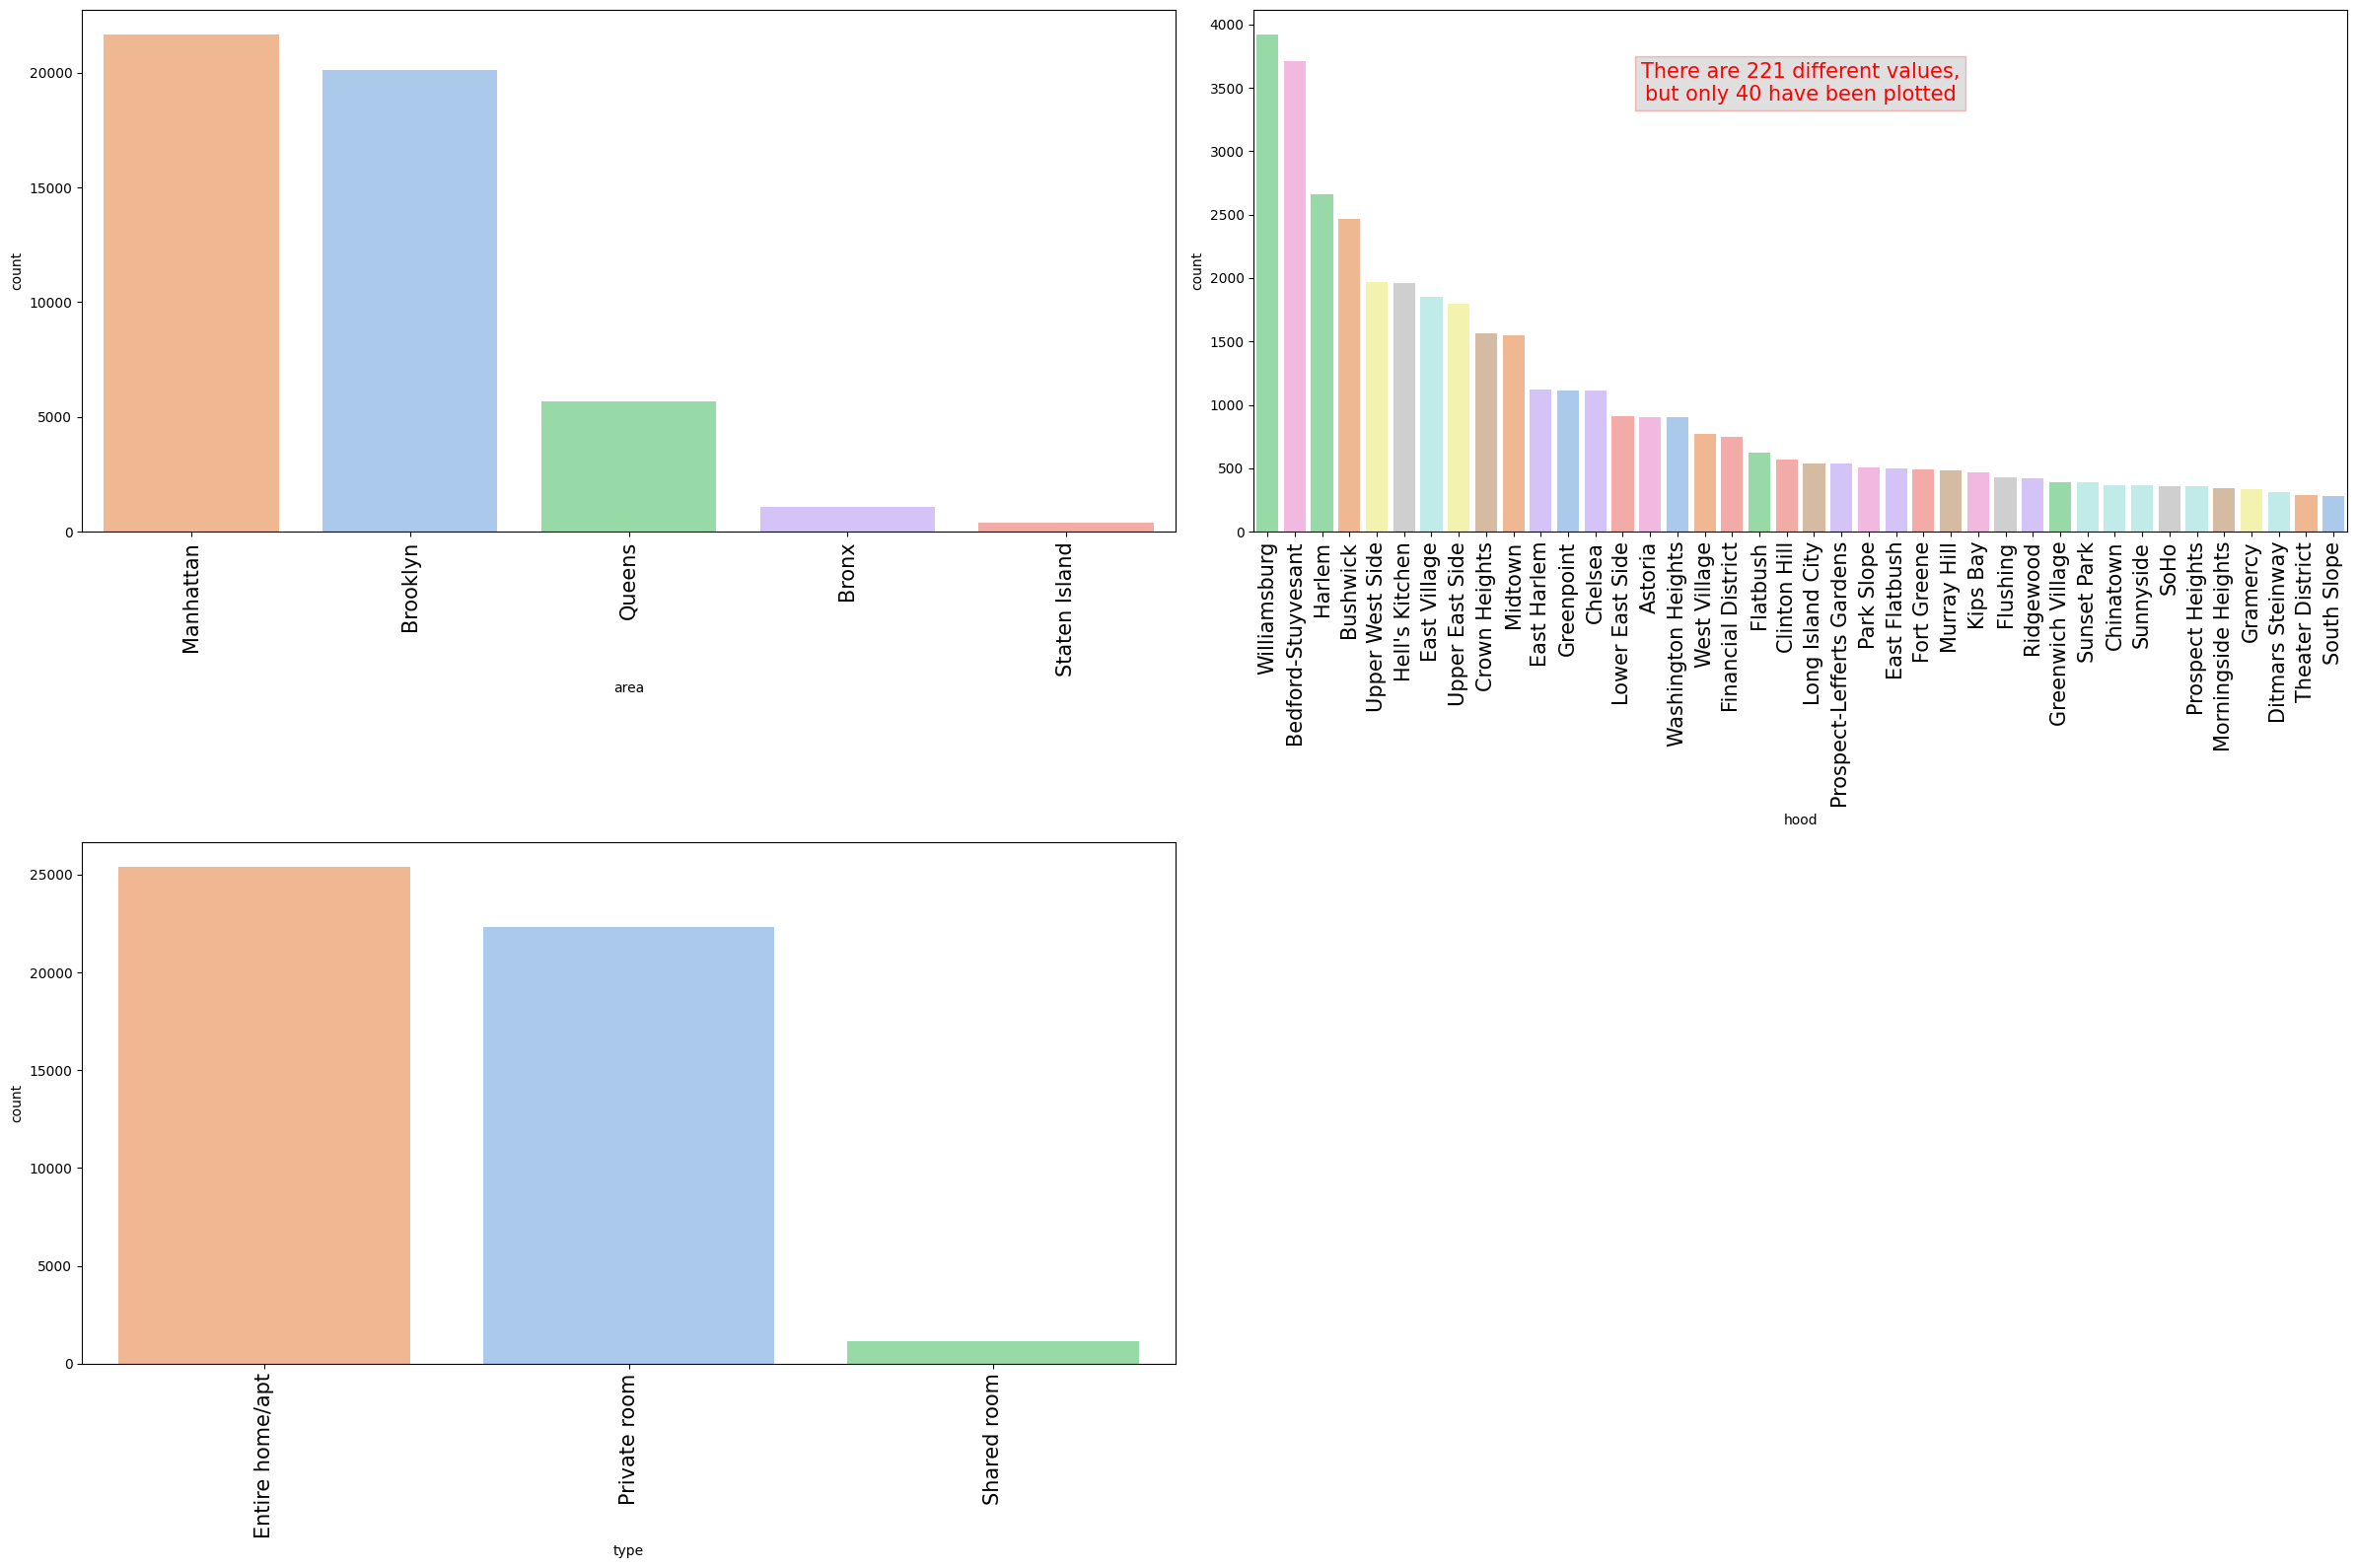

--------------------------------------------------------------
--------------------------------------------------------------

STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var


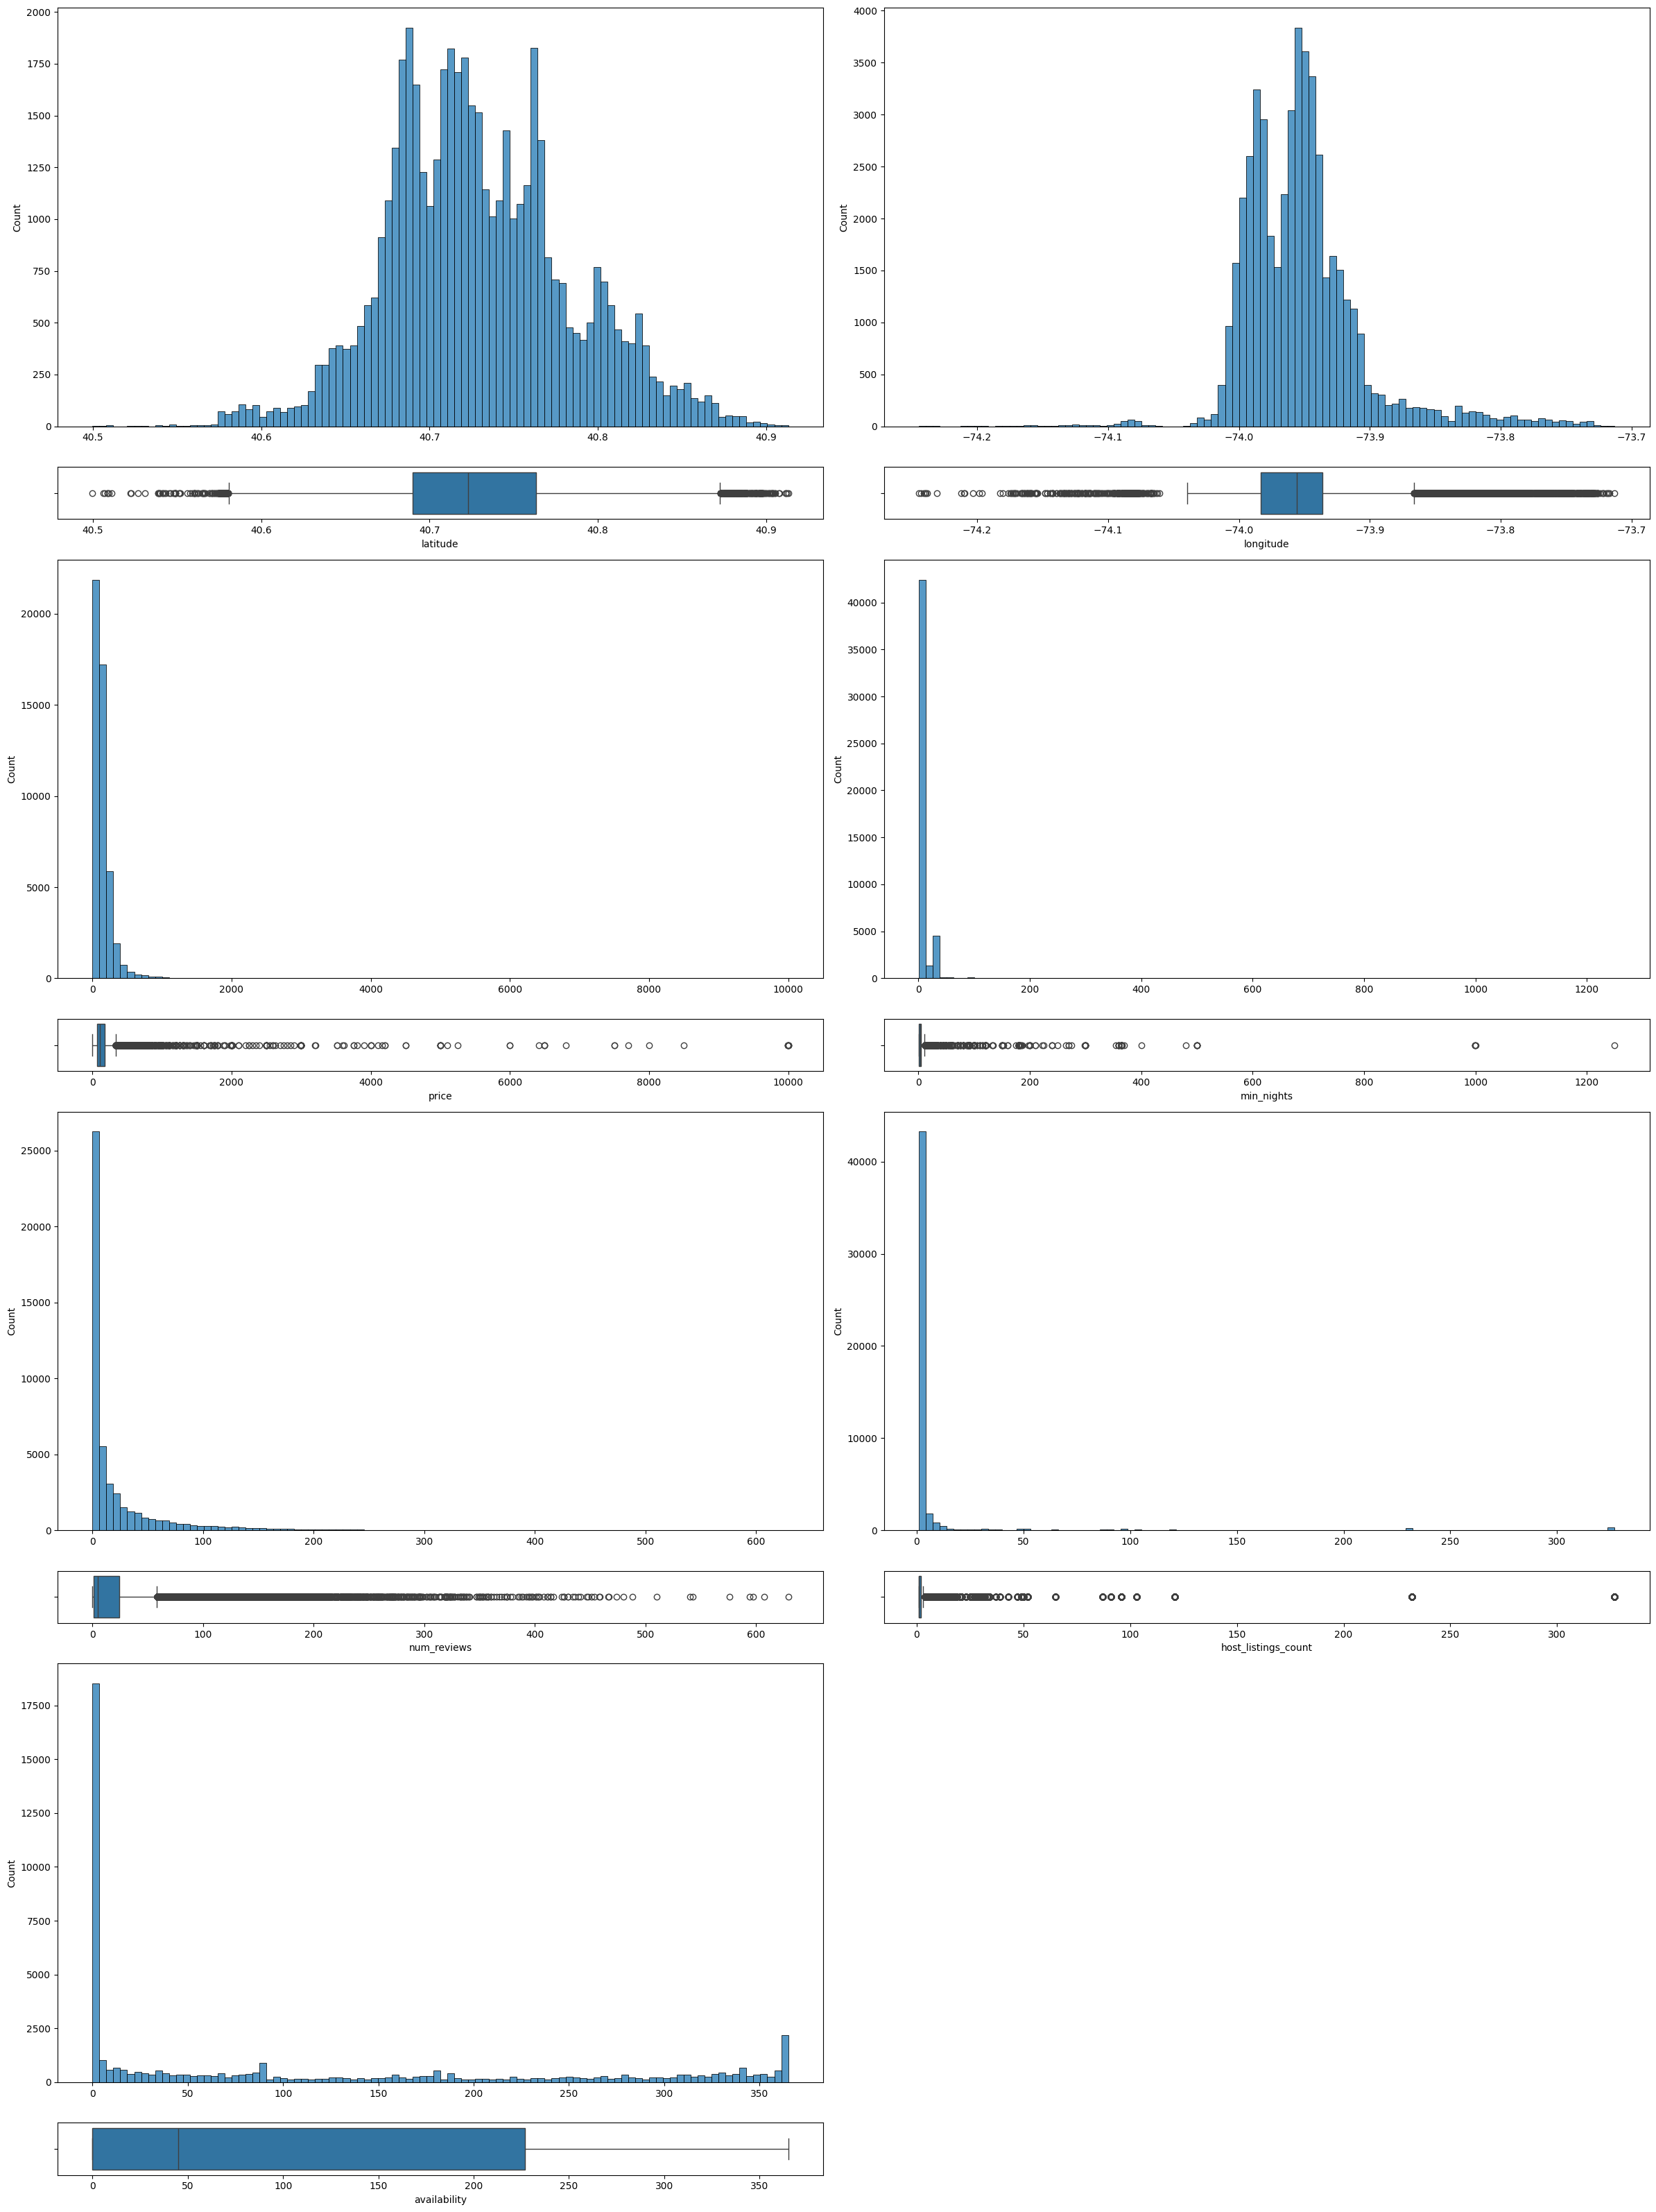

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.1) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)


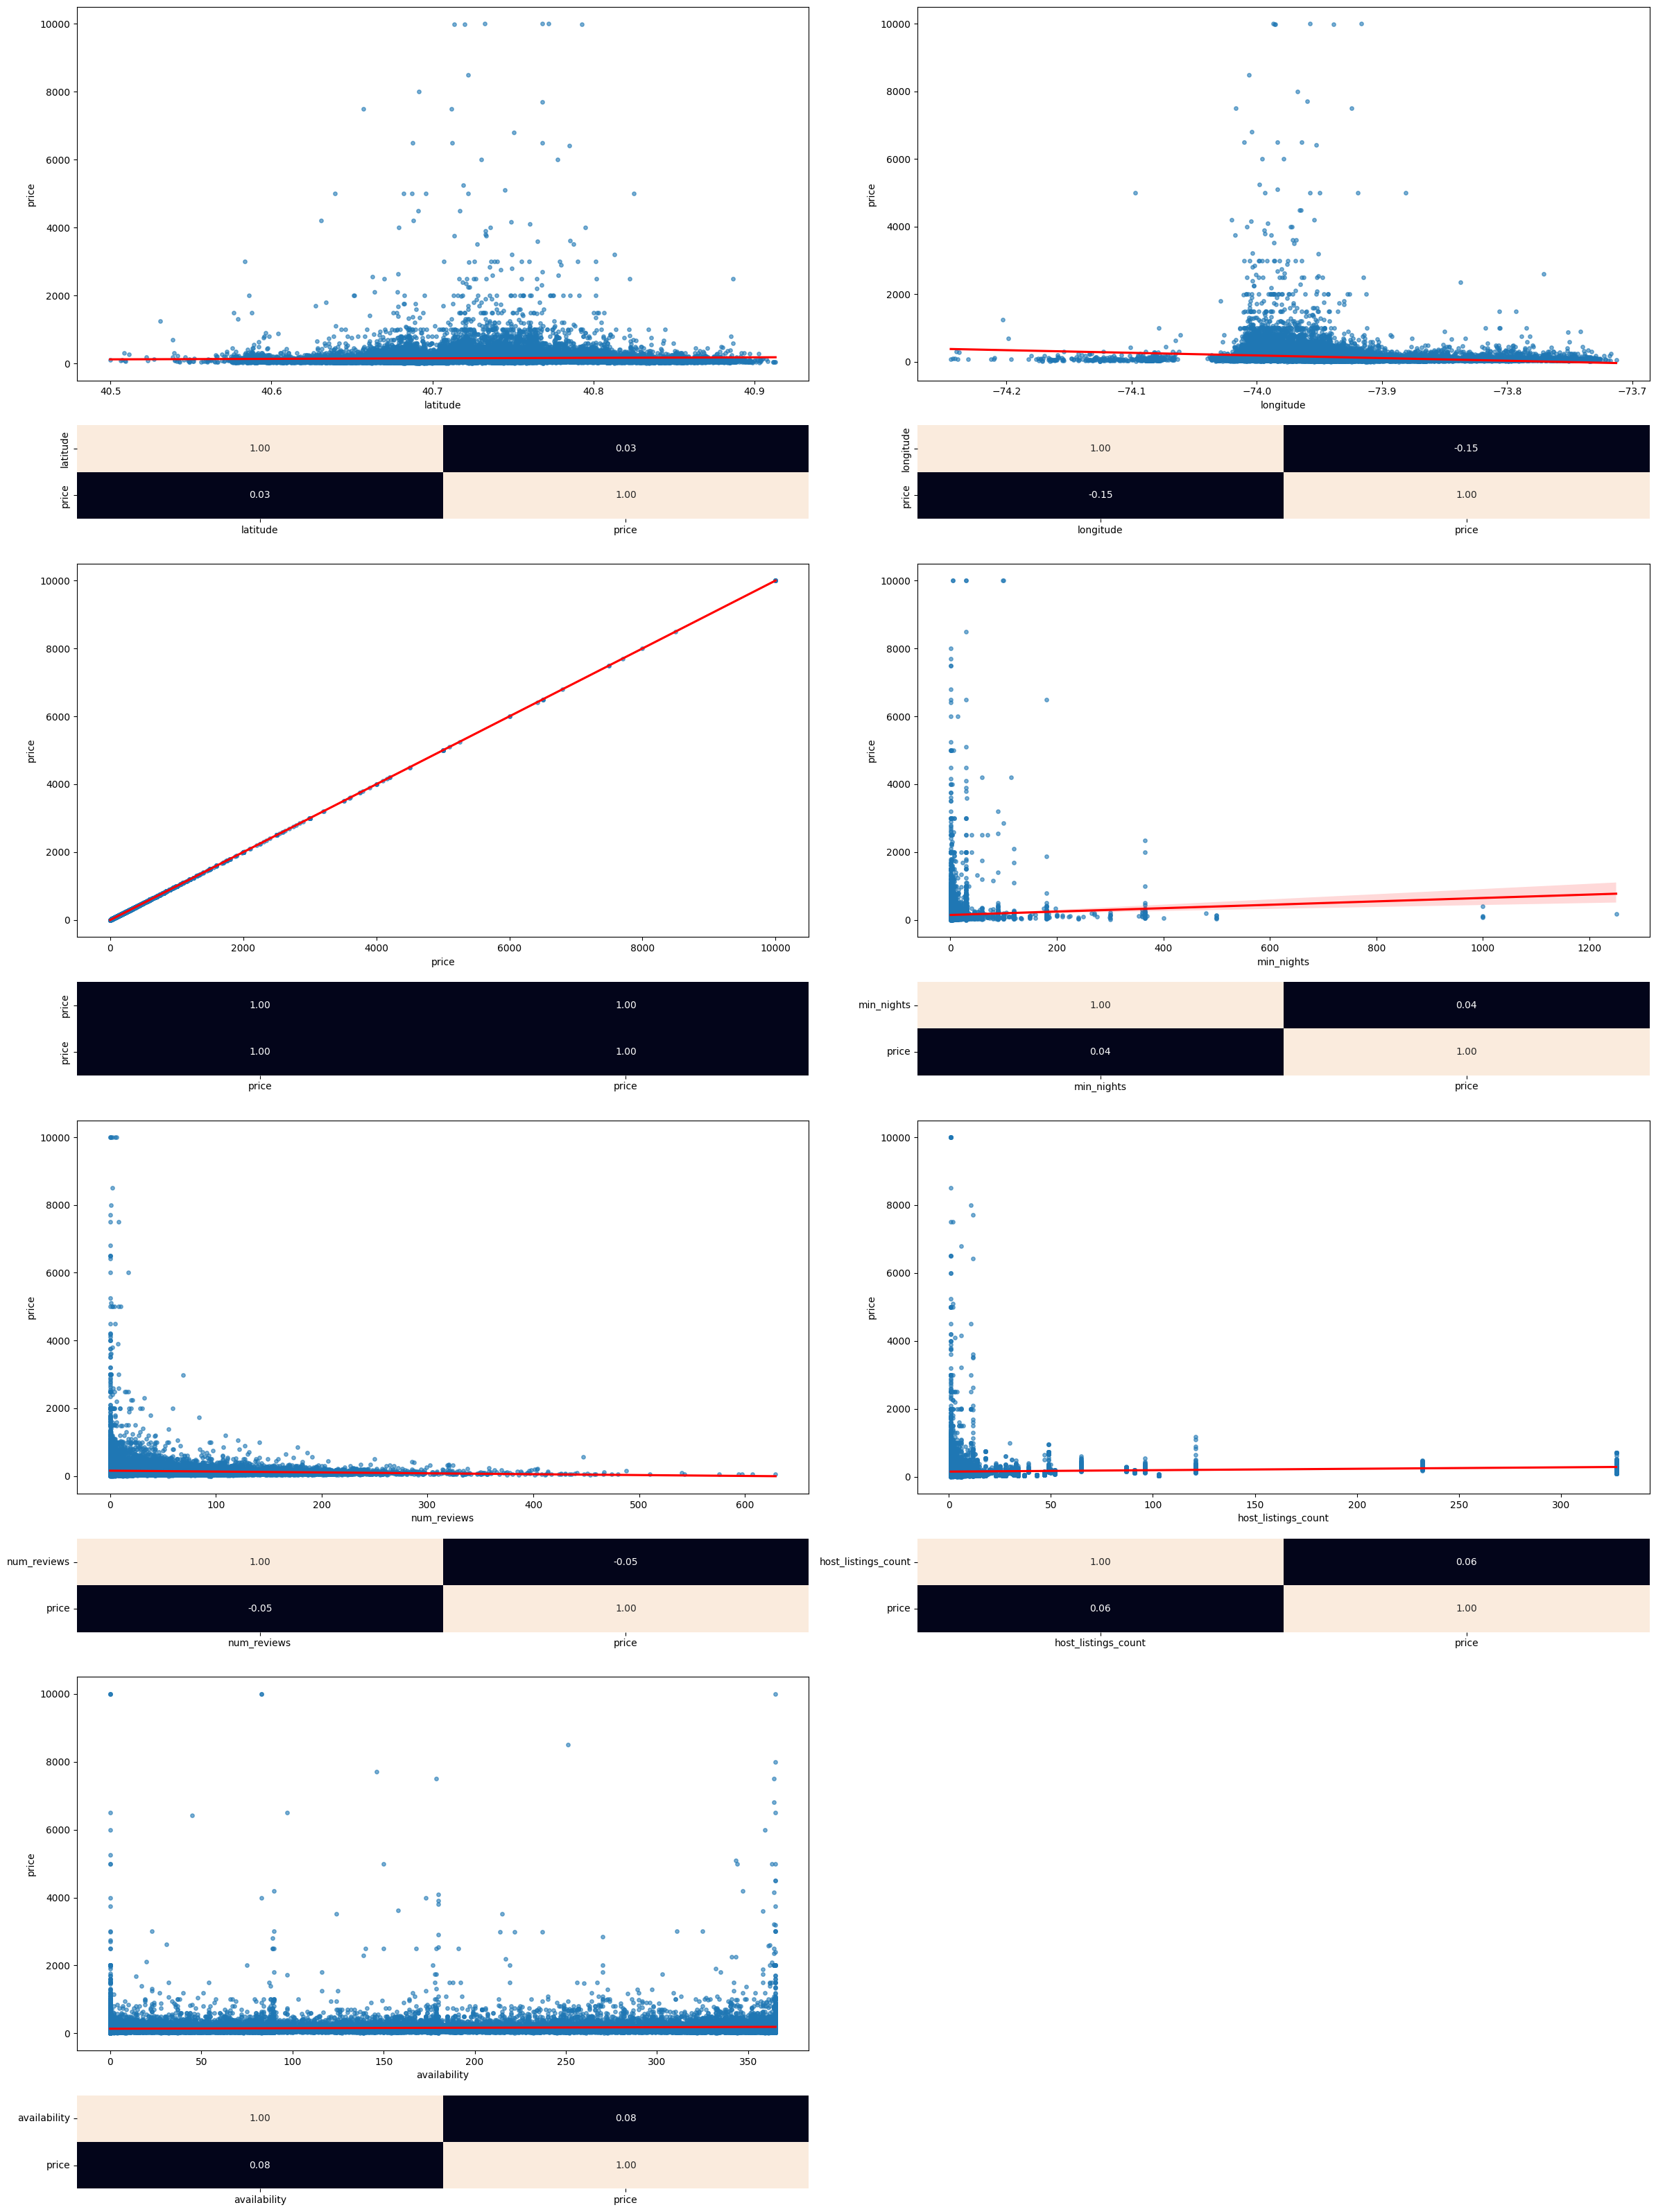

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)


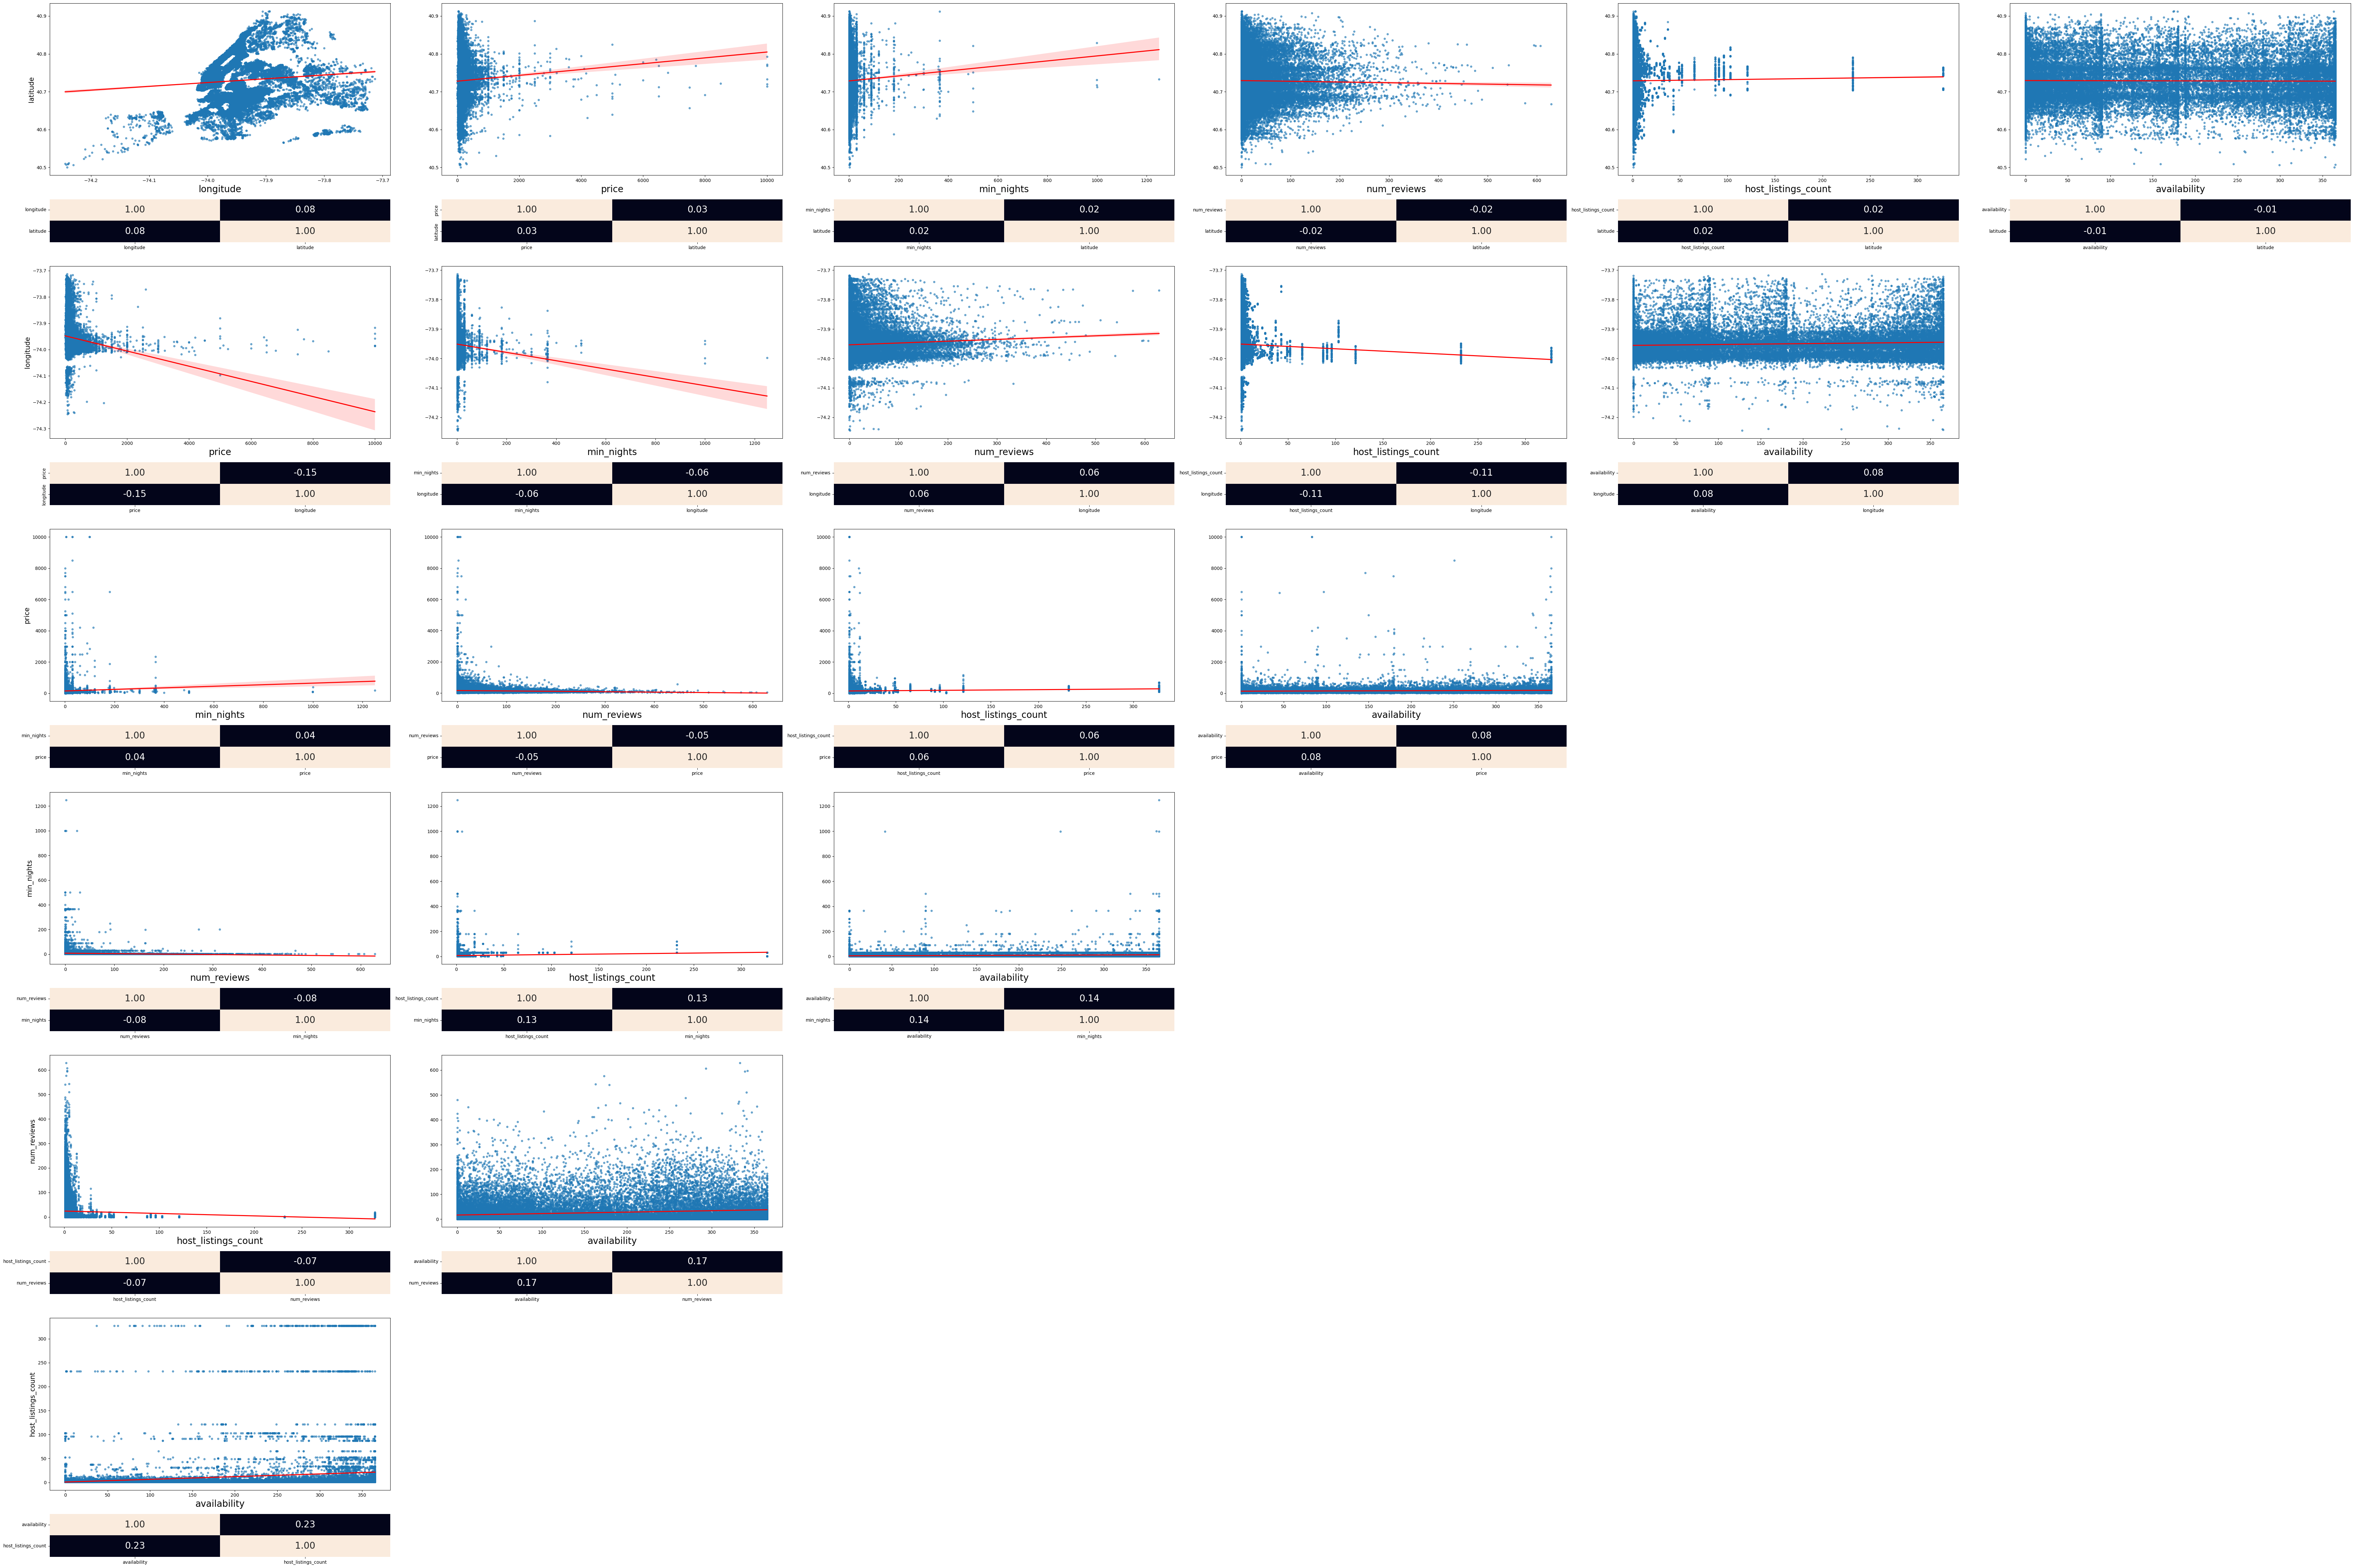

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)


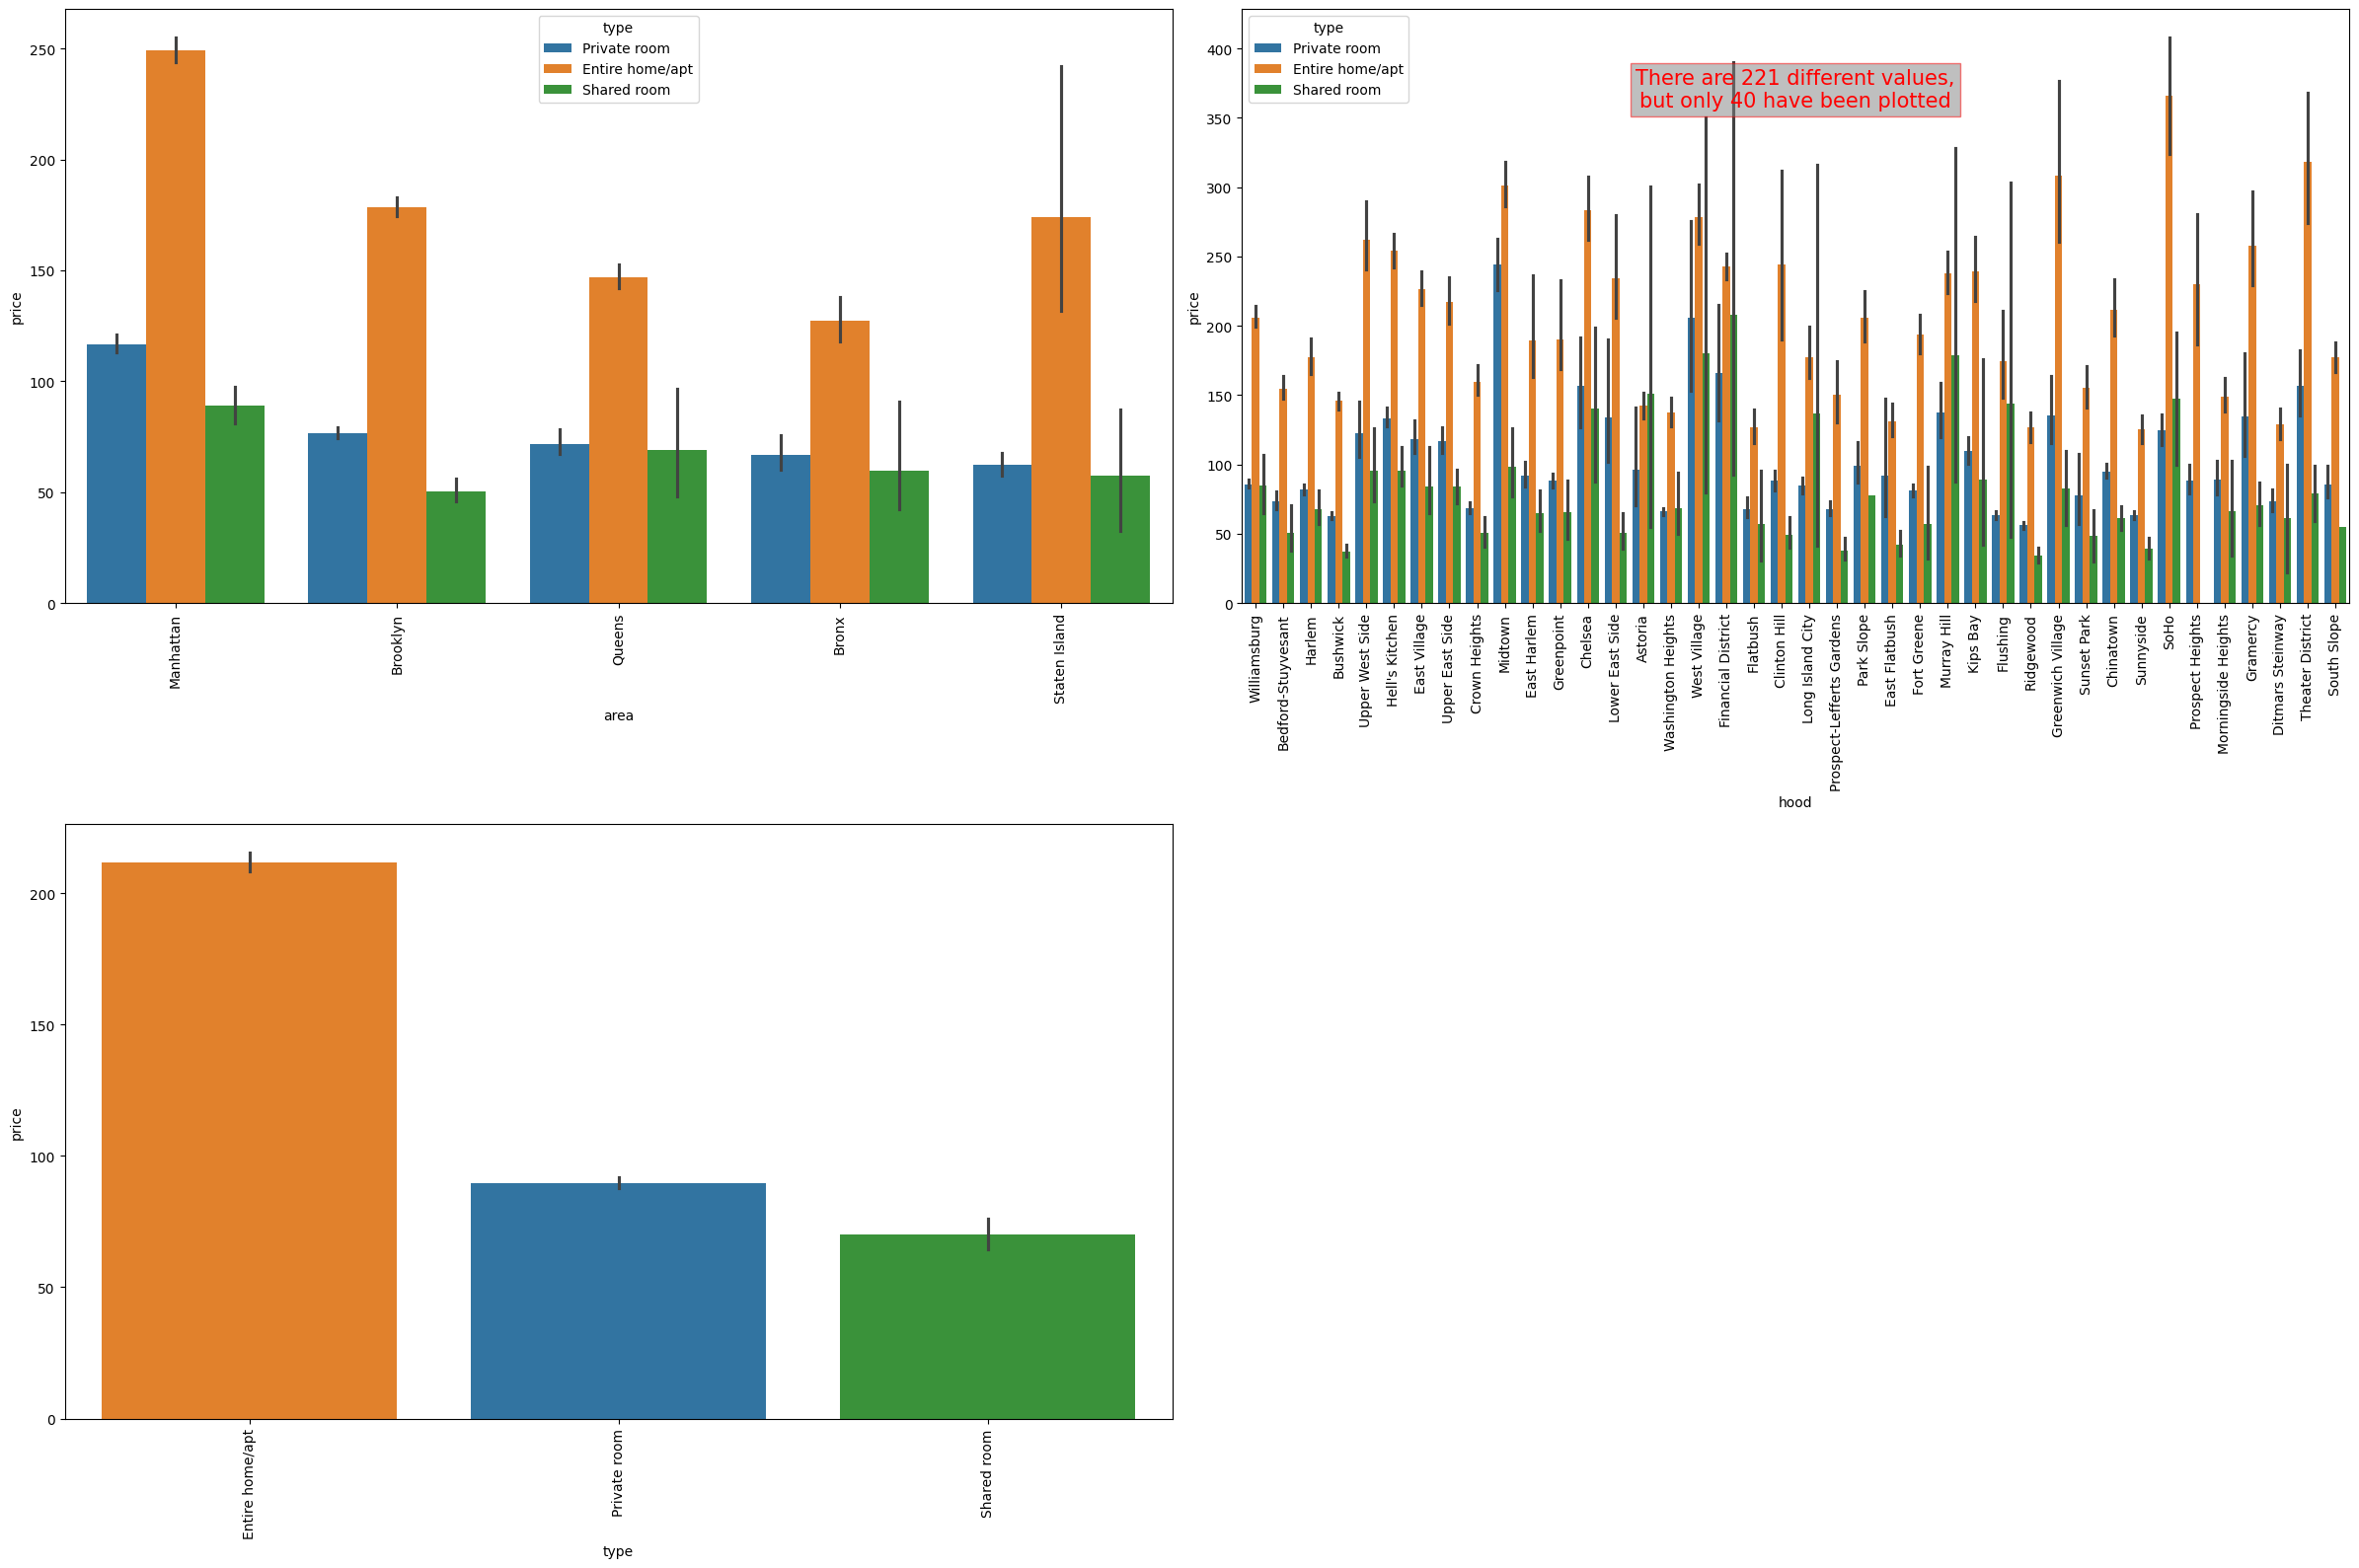

--------------------------------------------------------------
--------------------------------------------------------------

STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap)


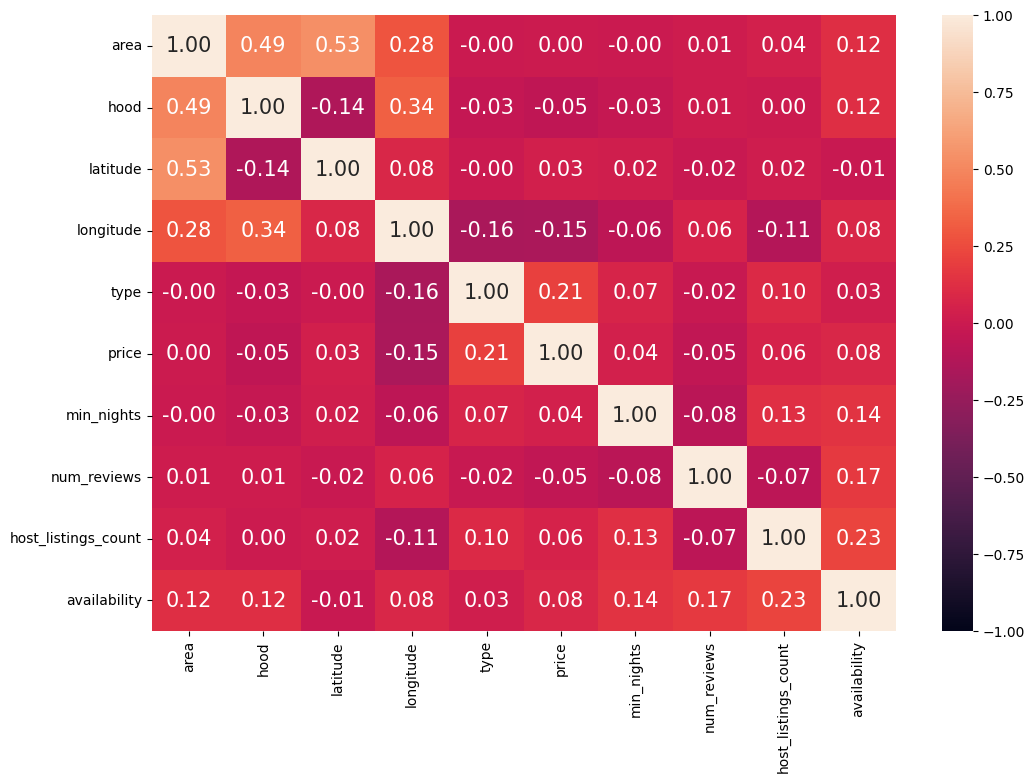

<Figure size 1200x800 with 0 Axes>

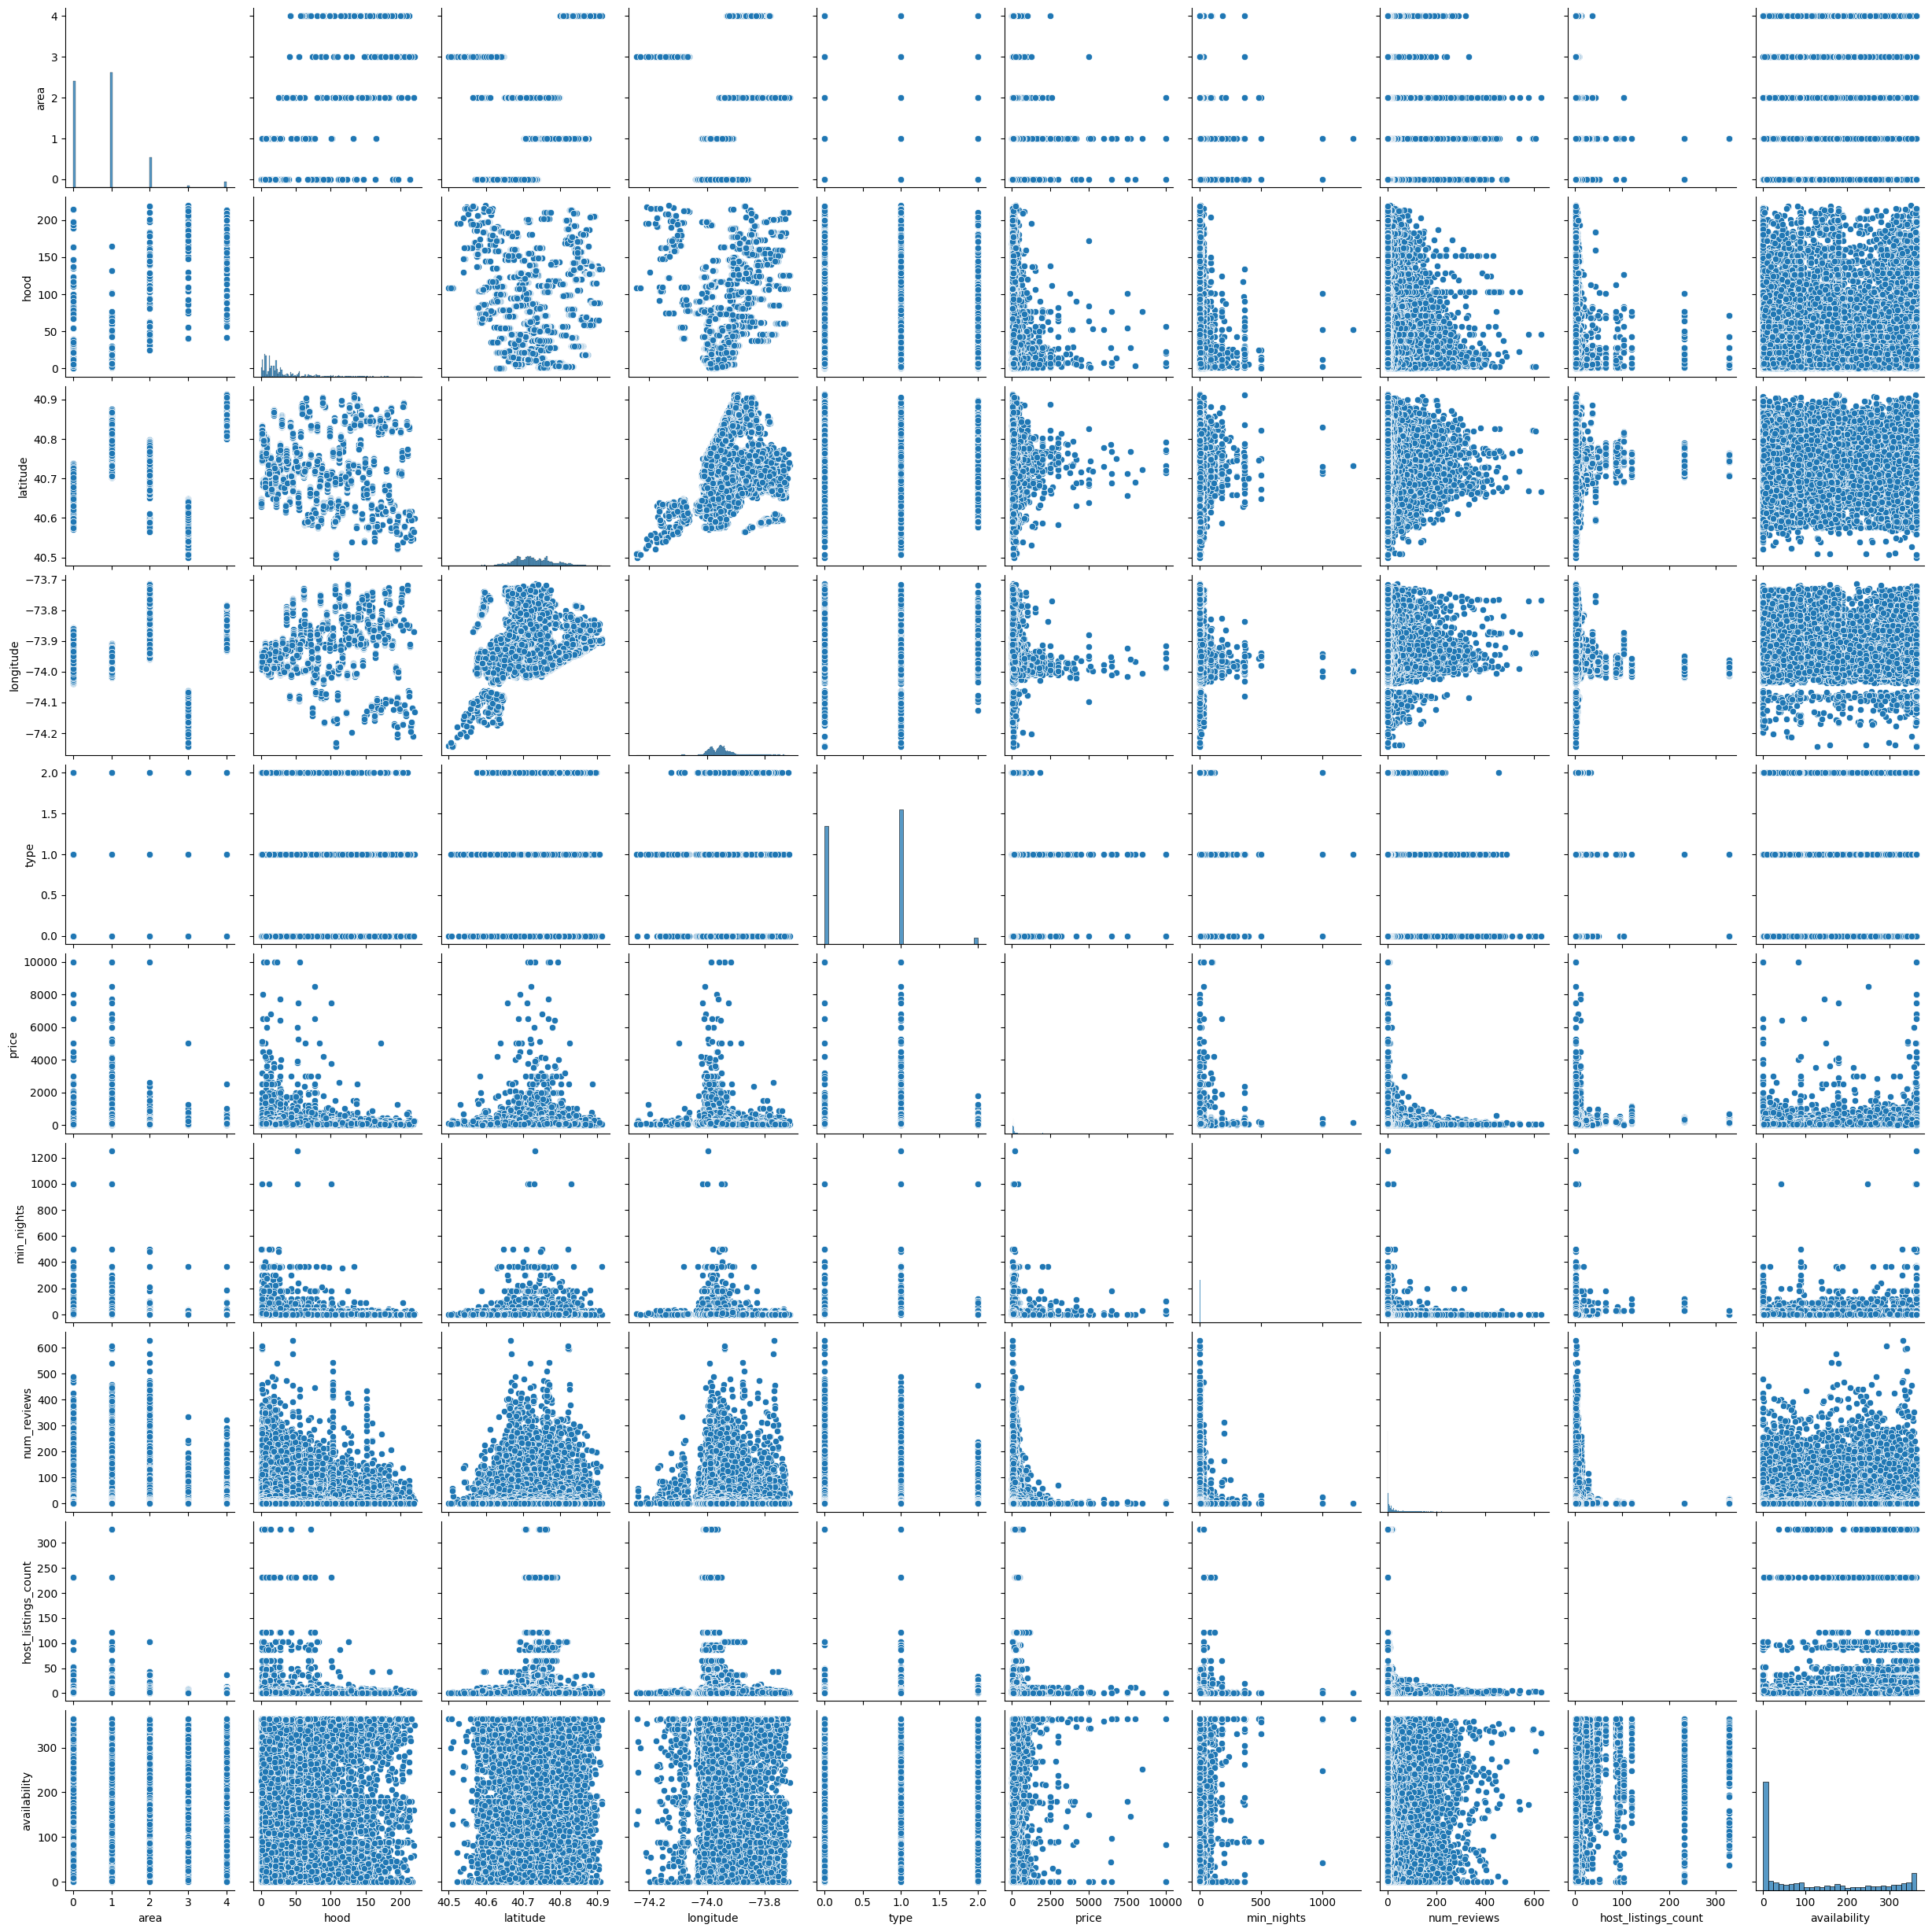

In [44]:
# STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var
print("STEP 6.1) UNIVARIABLE ANALYSIS - CATEGORY_var")

# Copy  of previous DataFrame
df_S6_1 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows)
)
    
# Flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:
    # Count unique values
    unique_count = df_S6_1[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S6_1[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S6_1[col].value_counts().index
    
    # Create countplot
    sns.countplot(
        ax = axes[idx],
        data = df_S6_1,
        x = col,
        hue = col,
        palette = my_palette,
        order = order,
        legend = False
    ).tick_params(axis='x', rotation=90, labelsize=my_font_size)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize=my_font_size,
            color='red',
            ha='center',
            va='top',
            bbox=dict(facecolor='grey', alpha=0.25, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var
print("STEP 6.2) UNIVARIABLE ANALYSIS - NUMERIC_var")

# Copy  of previous DataFrame
df_S6_2 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols =  num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 0.5] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Histogram (top)
        sns.histplot(
            ax = axes[row * 2, col],
            data = df_S6_2,
            x = var_to_plot[var_idx],
            bins = num_bins
        ).set_xlabel("")

        # Boxplot (bottom)
        sns.boxplot(
            ax=axes[row * 2 + 1, col],
            data=df_S6_2,
            x = var_to_plot[var_idx]
        )
        var_idx += 1

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.1) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)
print("STEP 7.1) MULTIVARIANT ANALYSIS - NUMERIC_var VS NUMERIC_target (Regplot + Heatmap)")

# Copy  of previous DataFrame
df_S7_1 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots with custom height ratios
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = num_cols,
    figsize=(figWidth_unit * num_cols, figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Loop through variables
var_idx = 0
for row in range(num_rows):
    for col in range(num_cols):
        if var_idx >= len(var_to_plot):
            # Hide unused subplots
            axes[row * 2, col].set_visible(False)
            axes[row * 2 + 1, col].set_visible(False)
            continue

        # Regplot (top)
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_1,
            x = var_to_plot[var_idx],
            y = y_var,
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        )

        # Boxplot (bottom)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_1[[var_to_plot[var_idx], y_var]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False
        )
        var_idx += 1

# Adjust layout
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)
print("STEP 7.2) MULTIVARIANT ANALYIS - NUMERIC_var VS NUMERIC_var (Regplot + Heatmap)")

# Copy  of previous DataFrame
df_S7_2 = df_S5_2.copy()

var_to_plot=numeric_var # Variable type for this plot
num_rows = len(var_to_plot) - 1 # Number of rows (one less than number of variables)

# Create subplots with two stacked plots (regplot + heatmap) per variable pair
fig, axes = plt.subplots(
    nrows = num_rows * 2,
    ncols = len(var_to_plot) - 1,
    figsize=(figWidth_unit * (len(var_to_plot) - 1), figHeight_unit * num_rows),
    gridspec_kw={'height_ratios': [4, 1] * num_rows}
)

# Flatten axes for easy handling
axes = np.array(axes)

# Track subplot usage
for row in range(num_rows):
    n_cols = len(var_to_plot) - row - 1 # Decreasing number of columns each row
    for col in range(n_cols):

        # Top: regplot
        sns.regplot(
            ax = axes[row * 2, col],
            data = df_S7_2,
            x = var_to_plot[row + col + 1],
            y = var_to_plot[row],
            scatter_kws = {'s': my_font_size, 'alpha': 0.6},
            line_kws = {'color': 'red'}
        ).set_xlabel(var_to_plot[row + col + 1],fontsize=20)

        # Show Y label only for first plot in row
        if col == 0:
            axes[row * 2, col].set_ylabel(var_to_plot[row],fontsize=my_font_size)
        else:
            axes[row * 2, col].set_ylabel("")

        # Bottom: heatmap (correlation)
        sns.heatmap(
            ax = axes[row * 2 + 1, col],
            data = df_S7_2[[var_to_plot[row + col + 1], var_to_plot[row]]].corr(),
            annot = True,
            fmt = ".2f",
            cbar = False,
            annot_kws = {"size": 20}
        )

    # Hide unused subplots on the right for this row
    for col in range(n_cols, len(var_to_plot) - 1):
        axes[row * 2, col].set_visible(False)
        axes[row * 2 + 1, col].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)
print("STEP 7.3) MULTIVARIANT ANALYIS - COMBINED NUMERIC_var VS NUMERIC_var (Barplot)")

# Copy  of previous DataFrame
df_S7_3 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot
num_rows = math.ceil(len(var_to_plot) / num_cols) # Number of rows for the figure

# Create subplots
fig, axes = plt.subplots(
    nrows = num_rows,
    ncols = num_cols,
    figsize = (figWidth_unit * num_cols, figHeight_unit * num_rows)
)

# flatten the axes array for easier access
axes = axes.flatten()  

# Loop through variables
idx = 0
for col in var_to_plot:

    # Count unique values
    unique_count = df_S7_3[col].nunique()
    
    # Limit the number of plotted categories if there are more than num_values_to_plot
    if unique_count > num_values_to_plot:
        order = df_S7_3[col].value_counts().head(num_values_to_plot).index
    else:
        order = df_S7_3[col].value_counts().index
    
    # Create barplot
    sns.barplot(
        ax=axes[idx],
        data = df_S7_3,
        x = col,
        y = y_var,
        hue = cat_var_comb,
        order = order,
        ).tick_params(axis='x', rotation=90, labelsize=10)
    
    # Add text box if truncated
    if unique_count > num_values_to_plot:
        msg = "There are " + str(unique_count) + " different values,\nbut only " + str(num_values_to_plot) + " have been plotted"
        axes[idx].text(
            x = 0.5,
            y = 0.9,
            s = msg,
            transform=axes[idx].transAxes,
            fontsize = my_font_size,
            color = 'red',
            ha = 'center',
            va = 'top',
            bbox = dict(facecolor='grey', alpha=0.5, edgecolor='red')
        )
    
    idx += 1

# Turn off unused axes if there are any
for j in range(idx, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and display
plt.tight_layout()
plt.show()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap + Pairplot)
print("STEP 7.4) MULTIVARIANT ANALYIS - GLOBAL (Heatmap)")

# Copy  of previous DataFrame
df_S7_4 = df_S5_2.copy()

var_to_plot=category_var # Variable type for this plot

# Encode categorical variables using the Series.factorize() method
for col in var_to_plot:
    codes, uniques = df_S7_4[col].factorize()
    df_S7_4[col] = codes  # replace column with integer codes

# Create Plot
fig = plt.figure(
    figsize=(figWidth_unit,figHeight_unit)
)

# Glboal heatmap
sns.heatmap(
    data = df_S7_4.corr(),
    annot = True,
    vmin = -1,
    vmax = 1,
    fmt = ".2f",
    annot_kws = {"size": my_font_size}
        )
# Display
plt.show()

# Create Plot
fig = plt.figure(
    figsize=(figWidth_unit,figHeight_unit)
)

# Create pairplot
sns.pairplot(
    data = df_S7_4
)

# Display
plt.show()

In [53]:
# STEP 8.1) DEFINE OUTLIERS
print("STEP 8.1) DEFINE OUTLIERS")

# Copy  of previous DataFrame
df_S8_1=df_S5_2.copy()

# Print info
display(df_S8_1.describe())

# Include target variable y as part of the numeric list
if y_var not in numeric_var:
    cols = numeric_var + [y_var]
else:
    cols = numeric_var

# Initialize containers
lower_limits = []
upper_limits = []
n_outliers_lower = []
n_outliers_upper = []
pct_outliers_lower = []
pct_outliers_upper = []

len(df_S8_1.index)

for col in cols:
    Q1 = df_S8_1[col].quantile(0.25)
    Q3 = df_S8_1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calulate limits
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Count num of outliers
    n_low = (df_S8_1[col] < lower).sum()
    n_high = (df_S8_1[col] > upper).sum()

    # Percentages of outliers
    pct_low = (n_low / len(df_S8_1.index)) * 100
    pct_high = (n_high / len(df_S8_1.index)) * 100

    # Save limits
    lower_limits.append(lower)
    upper_limits.append(upper)

    # Save num of outliers
    n_outliers_lower.append(n_low)
    n_outliers_upper.append(n_high)

    # Save percentages of outliers
    pct_outliers_lower.append(pct_low)
    pct_outliers_upper.append(pct_high)


# Build DataFrame with all results
df_limits = pd.DataFrame(
    [
        lower_limits,
        upper_limits,
        n_outliers_lower,
        n_outliers_upper,
        pct_outliers_lower,
        pct_outliers_upper
    ],
    columns=cols,
    index=[
        "lower_limit",
        "upper_limit",
        "n_outliers_lower",
        "n_outliers_upper",
        "pct_outliers_lower",
        "pct_outliers_upper"
    ]
)
# Display results
display(df_limits)

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 8.2) CLEAN OUTLIERS
print("STEP 8.2) CLEAN OUTLIERS")

# Copy  of previous DataFrame
df_S8_2=df_S8_1.copy()

# Include target variable y as part of the numeric list
if y_var not in numeric_var:
    cols = numeric_var + [y_var]
else:
    cols = numeric_var

# Loop through each column and apply filtering rules
for col in cols:
    low_limit = df_limits.loc["lower_limit", col]
    high_limit = df_limits.loc["upper_limit", col]
    pct_low = df_limits.loc["pct_outliers_lower", col]
    pct_high = df_limits.loc["pct_outliers_upper", col]
    
    # Remove low outliers if below threshold
    print(f"- ATTRIBUTE {col}:")
    if pct_low <= low_outliers_threshold:
        df_S8_2 = df_S8_2[df_S8_2[col] >= low_limit]
        print(f" - ⚠️ REMOVED lower outliers ({pct_low:.2f}% <= {low_outliers_threshold}%)")
    else:
        print(f" - ✅ KEPT lower outliers ({pct_low:.2f}% > {low_outliers_threshold}%)")
    
    # Remove high outliers if below threshold
    if pct_high <= up_outliers_threshold:
        df_S8_2 = df_S8_2[df_S8_2[col] <= high_limit]
        print(f" - ⚠️ REMOVED upper outliers ({pct_high:.2f}% <= {up_outliers_threshold}%)")
    else:
        print(f" - ✅ KEPT upper outliers ({pct_high:.2f}% > {up_outliers_threshold}%)")
    print("\n")
print("- ✅Outliers cleaning completed.")
print(f" - ℹ️ Original df's rows: {len(df_S8_1)}")
print(f" - ℹ️ Cleaned df's  rows: {len(df_S8_2)}")
display(df_S8_2.describe())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# STEP 9) MISSING VALUES
print("STEP 9) MISSING VALUES")

# Copy  of previous DataFrame
df_S9 = df_S8_2.copy()

# Identify categorical variables suitable for grouping (<6 unique values)
group_vars = []
for col in category_var:
    if df_S9[col].nunique() < 6:
        group_vars.append(col)

# Calculate percentage of missing values per column
missing_pct = (df_S9.isnull().sum() / len(df_S9)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)

if len(missing_pct) == 0:
    print("- ✅ DataFrame has no missing values at all")
else:
    # Process each column with missing data
    for col in missing_pct.index:
        pct = missing_pct[col]
        print(f"- ⚠️ Column: {col} → {pct:.2f}% missing")

        # Case 1: Fill with grouped median if percentage above threshold
        if pct > th_fill and len(group_vars) > 0:
            print(f" - ⚠️ FILLED missing values in {col} using grouped median by {group_vars}...\n")

            # Compute median by group
            medians = df_S9.groupby(group_vars)[col].median().reset_index()
            medians = medians.rename(columns={col: f"median_{col}"})

            # Merge medians back into df
            df_S9 = pd.merge(df_S9, medians, on=group_vars, how="left")

            # Fill missing values
            df_S9[col] = df_S9[col].fillna(df_S9[f"median_{col}"])

            # Drop helper column
            df_S9 = df_S9.drop(columns=[f"median_{col}"])

        # Case 2: Drop rows if percentage below or equal to threshold
        elif pct <= th_fill:
            print(f" - ⚠️ DROPPED rows with missing values in {col} ({pct:.2f}% ≤ {th_fill}%)...\n")
            df_S9 = df_S9.dropna(subset=[col])

        # Case 3: Skip if no suitable grouping columns
        else:
            print(f" - ℹ️ No suitable group columns found — skipping fill for {col}.\n")

# Summary
print(f"- ℹ️ Remaining missing values per column:\n{df_S9.isnull().sum()}")

print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------")
print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# SPLIT)
print("SPLIT) X_train, X_test, y_train, y_test")

# Copy  of previous DataFrame
df_SPLIT = df_S9.copy()

X = df_SPLIT.drop(
    labels = y_var,
    axis = 1
)
y = df_SPLIT[y_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = my_test_size, random_state = random_seed)

print("- ℹ️ Shape of DataFrames after SPLIT:")
print(" - X_train:",X_train.shape)
print(" - X_test:",X_test.shape)
print(" - y_train:",y_train.shape)
print(" - y_test:",y_test.shape)

print("\n- ℹ️ Content of DataFrames after SPLIT:")
print(" - X_train:\n",X_train.head(5))
print(" - X_test:\n",X_test.head(5))
print(" - y_train:\n",y_train.head(5))
print(" - y_test:\n",y_test.head(5))

print("\n- ℹ️ Info of DataFrames after SPLIT:")
print(" - X_train:",X_train.info())
print(" - X_test:",X_test.info())
print(" - y_train:",y_train.info())
print(" - y_test:",y_test.info())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# SELECT SCALER & ENCONDER) (StandardScaler or MinMaxScaler) & (LabelEncoder or OneHotEncoder)
print("SELECT SCALER & ENCONDER) (StandardScaler or MinMaxScaler) & (LabelEncoder or OneHotEncoder)")

# List of columns
columns = X_train.columns.tolist()

# -------------------------------
# HEADER ROW
# -------------------------------
header_cells = [widgets.Label(value="", layout=widgets.Layout(width=cell_width, height=cell_height))]
for i in range(len(columns)):
    header = widgets.Label(
        value=columns[i],
        layout=widgets.Layout(width=cell_width, height=cell_height)
    )
    header.style = {'font_size': font_size}
    header_cells.append(header)
header_row = widgets.HBox(header_cells)

# -------------------------------
# SCALER TYPE ROW
# -------------------------------
scaler_type_drop_down_cells = [widgets.Label(value="Scaler:", layout=widgets.Layout(width=cell_width, height=cell_height))]
scaler_type = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_type_drop = widgets.Dropdown(
        options=["StandardScaler", "MinMaxScaler"],
        value="StandardScaler",
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'})
    else:
        scaler_type_drop = widgets.Label(
        value="-",
        layout=widgets.Layout(width=cell_width, height=cell_height))

    scaler_type_drop_down_cells.append(scaler_type_drop)
    scaler_type.append(scaler_type_drop)
scaler_type_row = widgets.HBox(scaler_type_drop_down_cells)

# -------------------------------
# ENCODER TYPE ROW
# -------------------------------
encoder_type_drop_down_cells = [widgets.Label(value="Encoder:", layout=widgets.Layout(width=cell_width, height=cell_height))]
encoder_type = []
for i in range(len(columns)):
    if columns[i] in category_var:
        encoder_type_drop = widgets.Dropdown(
        options=["LabelEncoder", "OneHotEncoder"],
        value="LabelEncoder",
        layout=widgets.Layout(width=cell_width, height=cell_height),
        style={'description_width': '0px'})
    else:
        encoder_type_drop = widgets.Label(
        value="-",
        layout=widgets.Layout(width=cell_width, height=cell_height))

    encoder_type_drop_down_cells.append(encoder_type_drop)
    encoder_type.append(encoder_type_drop)
encoder_type_row = widgets.HBox(encoder_type_drop_down_cells)

# -------------------------------
# Combine into horizontal scrollable table
# -------------------------------
# Make the outer box scrollable horizontally
scrollable_box = widgets.VBox([header_row, scaler_type_row, encoder_type_row])
scrollable_box.layout = widgets.Layout(
    overflow_x='auto',
    width=max_table_width,
    height='auto'
)

display(scrollable_box)

STEP 8.1) DEFINE OUTLIERS


latitude     longitude         price    min_nights   num_reviews  \
count  48895.000000  48895.000000  48895.000000  48895.000000  48895.000000   
mean      40.728949    -73.952170    152.720687      7.029962     23.274466   
std        0.054530      0.046157    240.154170     20.510550     44.550582   
min       40.499790    -74.244420      0.000000      1.000000      0.000000   
25%       40.690100    -73.983070     69.000000      1.000000      1.000000   
50%       40.723070    -73.955680    106.000000      3.000000      5.000000   
75%       40.763115    -73.936275    175.000000      5.000000     24.000000   
max       40.913060    -73.712990  10000.000000   1250.000000    629.000000   

       host_list_count  availability  
count     48895.000000  48895.000000  
mean          7.143982    112.781327  
std          32.952519    131.622289  
min           1.000000      0.000000  
25%           1.000000      0.000000  
50%           1.000000     45.000000  
75%           2.000000    227.000000  
max         327.000000    365.000000

latitude    longitude        price   min_nights  \
lower_limit          40.580578   -74.053263   -90.000000    -5.000000   
upper_limit          40.872637   -73.866082   334.000000    11.000000   
n_outliers_lower    171.000000   373.000000     0.000000     0.000000   
n_outliers_upper    254.000000  2460.000000  2972.000000  6607.000000   
pct_outliers_lower    0.349729     0.762859     0.000000     0.000000   
pct_outliers_upper    0.519481     5.031189     6.078331    13.512629   

                    num_reviews  host_list_count  availability  
lower_limit          -33.500000        -0.500000        -340.5  
upper_limit           58.500000         3.500000         567.5  
n_outliers_lower       0.000000         0.000000           0.0  
n_outliers_upper    6021.000000      7081.000000           0.0  
pct_outliers_lower     0.000000         0.000000           0.0  
pct_outliers_upper    12.314143        14.482053           0.0

--------------------------------------------------------------
--------------------------------------------------------------

STEP 8.2) CLEAN OUTLIERS
- ATTRIBUTE latitude:
 - ⚠️ REMOVED lower outliers (0.35% <= 5.0%)
 - ⚠️ REMOVED upper outliers (0.52% <= 5.0%)


- ATTRIBUTE longitude:
 - ⚠️ REMOVED lower outliers (0.76% <= 5.0%)
 - ✅ KEPT upper outliers (5.03% > 5.0%)


- ATTRIBUTE price:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (6.08% > 5.0%)


- ATTRIBUTE min_nights:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (13.51% > 5.0%)


- ATTRIBUTE num_reviews:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (12.31% > 5.0%)


- ATTRIBUTE host_list_count:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ✅ KEPT upper outliers (14.48% > 5.0%)


- ATTRIBUTE availability:
 - ⚠️ REMOVED lower outliers (0.00% <= 5.0%)
 - ⚠️ REMOVED upper outliers (0.00% <= 5.0%)


- ✅Outliers cleaning completed.
 - ℹ️ Original df's rows: 

latitude     longitude         price    min_nights   num_reviews  \
count  48163.000000  48163.000000  48163.000000  48163.000000  48163.000000   
mean      40.729375    -73.951383    153.301933      7.056952     23.238336   
std        0.052167      0.043936    240.186546     20.497308     44.608743   
min       40.580780    -74.039420      0.000000      1.000000      0.000000   
25%       40.690810    -73.982680     69.000000      1.000000      1.000000   
50%       40.723380    -73.955570    109.000000      3.000000      5.000000   
75%       40.762955    -73.936550    178.000000      5.000000     23.000000   
max       40.872570    -73.712990  10000.000000   1250.000000    629.000000   

       host_list_count  availability  
count     48163.000000  48163.000000  
mean          7.218176    111.628366  
std          33.194994    131.220145  
min           1.000000      0.000000  
25%           1.000000      0.000000  
50%           1.000000     43.000000  
75%           2.000000    223.000000  
max         327.000000    365.000000

--------------------------------------------------------------
--------------------------------------------------------------

STEP 9) MISSING VALUES
- ✅ DataFrame has no missing values at all
- ℹ️ Remaining missing values per column:
area               0
hood               0
latitude           0
longitude          0
type               0
price              0
min_nights         0
num_reviews        0
host_list_count    0
availability       0
dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------
--------------------------------------------------------------

SPLIT) X_train, X_test, y_train, y_test
- ℹ️ Shape of DataFrames after SPLIT:
 - X_train: (38530, 9)
 - X_test: (9633, 9)
 - y_train: (38530,)
 - y_test: (9633,)



In [ ]:
# CONFIRM SCALER) StandardScaler or MinMaxScaler
print("CONFIRM SCALER) StandardScaler or MinMaxScaler")

# Copy  of previous DataFrame
X_train_es = X_train.copy()
X_test_es = X_test.copy()

# List of columns
columns = X_train_es.columns.tolist()

# Validate box inputs
for i in range(len(scaler_type)):
    if  scaler_type[i].value not in ["StandardScaler", "MinMaxScaler"] and columns[i] in numeric_var:
        raise ValueError("- ❌ Missing Scaler selection in column " + columns[i])
print("- ✅ Scalers selections validated successfully")

# Instance scaler for each category attribute
scaler_dic = {}
for i in range(len(scaler_type)):
    if scaler_type[i].value == "StandardScaler" and columns[i] in numeric_var:
        scaler = StandardScaler()
        scaler_dic[columns[i]] = scaler
    elif scaler_type[i].value == "MinMaxScaler" and columns[i] in numeric_var:
        scaler = MinMaxScaler()
        scaler_dic[columns[i]] = scaler
print("- ✅ All Scalers have been instanced successfully")

# Train scaler with ONLY train data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        scaler_dic[columns[i]].fit(X_train_es[[columns[i]]]) # Scaler expects 2D input
print("- ✅ All Scalers have been trained successfully")

# Apply scaler to BOTH train + test data
for i in range(len(columns)):
    if columns[i] in numeric_var:
        # Transform both sets
        X_train_es_aux = scaler_dic[columns[i]].transform(X_train_es[[columns[i]]])
        X_test_es_aux = scaler_dic[columns[i]].transform(X_test_es[[columns[i]]])
        # Determine column_name based on scaler type
        if scaler_type[i].value == "StandardScaler":
            new_col_name = columns[i] +"_SS"
        elif scaler_type[i].value == "MinMaxScaler":
            new_col_name = columns[i] +"_MMS"
        else:
            new_col_name = columns[i]
        # Convert to DataFrame
        X_train_es_aux = pd.DataFrame(X_train_es_aux, index=X_train_es.index, columns=[new_col_name])
        X_test_es_aux = pd.DataFrame(X_test_es_aux, index=X_test_es.index, columns=[new_col_name])
         # Concatenate back
        X_train_es = pd.concat([X_train_es, X_train_es_aux], axis=1)
        X_test_es = pd.concat([X_test_es, X_test_es_aux], axis=1)
        print("- ✅ Train and Test data have been scaled for: " + columns[i] + " - " + scaler_type[i].value)

# Keep only scaled columms
scaled_cols = []
for i in range(len(columns)):
    if columns[i] in numeric_var:
        if scaler_type[i].value == "StandardScaler":
            scaled_cols.append(columns[i] + "_SS")
        elif scaler_type[i].value == "MinMaxScaler":
            scaled_cols.append(columns[i] + "_MMS")
X_train_es = X_train_es[scaled_cols]
X_test_es = X_test_es[scaled_cols]

display(X_train_es.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# CONFIRM ENCONDER) LabelEncoder or OneHotEncoder
print("CONFIRM ENCONDER) LabelEncoder or OneHotEncoder")

# Copy  of previous DataFrame
X_train_en = X_train.copy()
X_test_en = X_test.copy()

# List of columns
columns = X_train_en.columns.tolist()

# Validate box inputs
for i in range(len(encoder_type)):
    if  encoder_type[i].value not in ["LabelEncoder", "OneHotEncoder"] and columns[i] in category_var:
        raise ValueError("- ❌ Missing Encoder selection in column " + columns[i])
print("- ✅ Encoders selections validated successfully")

# Instance encoder for each category attribute
enconder_dic = {}
for i in range(len(encoder_type)):
    if encoder_type[i].value == "LabelEncoder" and columns[i] in category_var:
        encoder = LabelEncoder()
        enconder_dic[columns[i]] = encoder
    elif encoder_type[i].value == "OneHotEncoder" and columns[i] in category_var:
        encoder = OneHotEncoder(sparse_output=False)
        enconder_dic[columns[i]] = encoder
print("- ✅ All Encoders have been instanced successfully")

# Train encoder with ONLY train data
for i in range(len(columns)):
    if columns[i] in category_var:
        if encoder_type[i].value == "LabelEncoder":
            enconder_dic[columns[i]].fit(X_train_en[columns[i]]) # LabelEncoder works with 1D input
        elif encoder_type[i].value == "OneHotEncoder":
            enconder_dic[columns[i]].fit(X_train_en[[columns[i]]]) # OneHotEncoder expects 2D input
print("- ✅ All Encoders have been trained successfully")

# Apply encoder to BOTH train + test data
for i in range(len(encoder_type)):
    if encoder_type[i].value == "LabelEncoder" and columns[i] in category_var:
        X_train_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_train_en[columns[i]])
        X_test_en[columns[i] +"_LE"] = enconder_dic[columns[i]].transform(X_test_en[columns[i]])
        print("- ✅ Train and Test data have been enconded for: " + columns[i] + " - LabelEncoder()")
    elif encoder_type[i].value == "OneHotEncoder" and columns[i] in category_var:
        # Transform both sets (2D)
        X_train_ohe = enconder_dic[columns[i]].transform(X_train_en[[columns[i]]])
        X_test_ohe = enconder_dic[columns[i]].transform(X_test_en[[columns[i]]])
        # Add "_OHE" suffix to new column names
        new_columns = [name + "_OHE" for name in enconder_dic[columns[i]].get_feature_names_out([columns[i]])]
        # Add "_OHE" suffix to new column names
        new_columns = []
        for j in range(len(enconder_dic[columns[i]].get_feature_names_out([columns[i]]))):
            name_with_suffix = enconder_dic[columns[i]].get_feature_names_out([columns[i]])[j] + "_OHE"
            new_columns.append(name_with_suffix)
        # Convert to DataFrame
        X_train_ohe = pd.DataFrame(X_train_ohe, index=X_train_en.index, columns=new_columns)
        X_test_ohe = pd.DataFrame(X_test_ohe, index=X_test_en.index, columns=new_columns)

        # Concatenate the encoded columns back to the dataset
        X_train_en = pd.concat([X_train_en, X_train_ohe], axis=1)
        X_test_en = pd.concat([X_test_en, X_test_ohe], axis=1)
        print("- ✅ Train and Test data have been enconded for: " + columns[i] + " - OneHotEncoder()")

# Keep only encoded columms
encoded_cols = []
for i in range(len(columns)):
    if columns[i] in category_var:
        if encoder_type[i].value == "LabelEncoder":
            encoded_cols.append(columns[i] + "_LE")
        elif encoder_type[i].value == "OneHotEncoder":
            for j in range(len(enconder_dic[columns[i]].get_feature_names_out([columns[i]]))):
                encoded_cols.append(enconder_dic[columns[i]].get_feature_names_out([columns[i]])[j] + "_OHE")
X_train_en = X_train_en[encoded_cols]
X_test_en = X_test_en[encoded_cols]

X_train_en.head()

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled
print("ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled")

# Concatenate NUMERIC_var_scaled with CATEGORY_var_encoded
X_train_assembled = pd.concat([X_train_es, X_train_en], axis=1)
X_test_assembled = pd.concat([X_test_es, X_test_en], axis=1)

# Print results
print("\n 🧮 X_train_assembled", X_train_assembled.shape)
display(X_train_assembled.head())
print("\n 🧮 X_test_assembled", X_test_assembled.shape)
display(X_test_assembled.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# FEATURE SELECTION) X_train_final & X_test_final
print("FEATURE SELECTION) X_train_final & X_test_final")

# Copy  of previous DataFrame
X_train_final = X_train_assembled.copy()
X_test_final = X_test_assembled.copy()

# Instance selector
num_features_to_keep = round(feature_keeping_threshold/100 * len(X_train_final.columns))
selection_model = SelectKBest(score_func = f_classif, k = num_features_to_keep)
print("- ✅ Selector have been instanced successfully to keep " + str(num_features_to_keep) + " features")

# Train selector with ONLY train data (y_train must be included because this is SUPERVISED selector)
selection_model.fit(X_train_final, y_train)
print("- ✅ Selector have been trained successfully")

# Drop non-selected features
keeping_mask = selection_model.get_support()
X_train_final = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[keeping_mask])
X_test_final = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[keeping_mask])

# Print results
print("\n 🧮 X_train_final", X_train_final.shape)
display(X_train_final.head())
print("\n 🧮 X_test_final", X_test_final.shape)
display(X_test_final.head())

print("--------------------------------------------------------------\n--------------------------------------------------------------\n")

# FINAL STEP) SAVE PROCESSED DATA
print("FINAL STEP) SAVE PROCESSED DATA")

output_path_train = output_path + "X_train_final.csv"
output_path_test = output_path + "X_test_final.csv"

X_train_final.to_csv(output_path_train, index=False)
X_test_final.to_csv(output_path_test, index=False)

print("- ✅ File saved at:", output_path)
print("- 💡 Reminder: data/processed folder is ignored in .gitignore")


CONFIRM SCALER) StandardScaler or MinMaxScaler
- ✅ Scalers selections validated successfully
- ✅ All Scalers have been instanced successfully
- ✅ All Scalers have been trained successfully
- ✅ Train and Test data have been scaled for: latitude - StandardScaler
- ✅ Train and Test data have been scaled for: longitude - StandardScaler
- ✅ Train and Test data have been scaled for: min_nights - StandardScaler
- ✅ Train and Test data have been scaled for: num_reviews - StandardScaler
- ✅ Train and Test data have been scaled for: host_list_count - StandardScaler
- ✅ Train and Test data have been scaled for: availability - StandardScaler


latitude_SS  longitude_SS  min_nights_SS  num_reviews_SS  \
13       1.320027     -0.221265      -0.249091        2.009284   
4294     1.354331     -0.016193      -0.199561        1.807753   
8578    -0.498269      0.857353      -0.298621       -0.476259   
3711    -0.482171      0.850298      -0.100501       -0.498652   
8809     0.109810     -0.093351      -0.001441       -0.498652   

      host_list_count_SS  availability_SS  
13              -0.18695         1.684496  
4294            -0.18695         1.562672  
8578            -0.18695        -0.850957  
3711            -0.18695        -0.850957  
8809            -0.18695        -0.850957

--------------------------------------------------------------
--------------------------------------------------------------

CONFIRM ENCONDER) LabelEncoder or OneHotEncoder
- ✅ Encoders selections validated successfully
- ✅ All Encoders have been instanced successfully
- ✅ All Encoders have been trained successfully
- ✅ Train and Test data have been enconded for: area - LabelEncoder()
- ✅ Train and Test data have been enconded for: hood - LabelEncoder()
- ✅ Train and Test data have been enconded for: type - LabelEncoder()
--------------------------------------------------------------
--------------------------------------------------------------

ASSEMBLED DATAFRAMES) X_train_assembled & X_test_assembled

 🧮 X_train_assembled (38530, 9)


latitude_SS  longitude_SS  min_nights_SS  num_reviews_SS  \
13       1.320027     -0.221265      -0.249091        2.009284   
4294     1.354331     -0.016193      -0.199561        1.807753   
8578    -0.498269      0.857353      -0.298621       -0.476259   
3711    -0.482171      0.850298      -0.100501       -0.498652   
8809     0.109810     -0.093351      -0.001441       -0.498652   

      host_list_count_SS  availability_SS  area_LE  hood_LE  type_LE  
13              -0.18695         1.684496        2      151        1  
4294            -0.18695         1.562672        2       74        1  
8578            -0.18695        -0.850957        1       22        1  
3711            -0.18695        -0.850957        1       22        0  
8809            -0.18695        -0.850957        1       72        1


 🧮 X_test_assembled (9633, 9)


latitude_SS  longitude_SS  min_nights_SS  num_reviews_SS  \
19085     1.963751      0.076214      -0.100501       -0.095591   
9027     -0.208507     -1.061581      -0.100501       -0.498652   
45493     2.202920      0.271499      -0.298621       -0.229944   
13566     0.310842     -1.072278      -0.249091       -0.476259   
39530     0.174776     -1.109150      -0.249091        0.352255   

       host_list_count_SS  availability_SS  area_LE  hood_LE  type_LE  
19085           -0.125243         1.555058        2       74        1  
9027            -0.186950        -0.850957        2       92        1  
45493           -0.186950         1.555058        2      154        1  
13566           -0.186950        -0.850957        2       27        1  
39530           -0.186950        -0.850957        2      156        0

--------------------------------------------------------------
--------------------------------------------------------------

FEATURE SELECTION) X_train_final & X_test_final
- ✅ Selector have been instanced successfully to keep 7 features
- ✅ Selector have been trained successfully

 🧮 X_train_final (38530, 7)


longitude_SS  min_nights_SS  num_reviews_SS  host_list_count_SS  \
0     -0.221265      -0.249091        2.009284            -0.18695   
1     -0.016193      -0.199561        1.807753            -0.18695   
2      0.857353      -0.298621       -0.476259            -0.18695   
3      0.850298      -0.100501       -0.498652            -0.18695   
4     -0.093351      -0.001441       -0.498652            -0.18695   

   availability_SS  hood_LE  type_LE  
0         1.684496    151.0      1.0  
1         1.562672     74.0      1.0  
2        -0.850957     22.0      1.0  
3        -0.850957     22.0      0.0  
4        -0.850957     72.0      1.0


 🧮 X_test_final (9633, 7)


longitude_SS  min_nights_SS  num_reviews_SS  host_list_count_SS  \
0      0.076214      -0.100501       -0.095591           -0.125243   
1     -1.061581      -0.100501       -0.498652           -0.186950   
2      0.271499      -0.298621       -0.229944           -0.186950   
3     -1.072278      -0.249091       -0.476259           -0.186950   
4     -1.109150      -0.249091        0.352255           -0.186950   

   availability_SS  hood_LE  type_LE  
0         1.555058     74.0      1.0  
1        -0.850957     92.0      1.0  
2         1.555058    154.0      1.0  
3        -0.850957     27.0      1.0  
4        -0.850957    156.0      0.0

--------------------------------------------------------------
--------------------------------------------------------------

FINAL STEP) SAVE PROCESSED DATA
- ✅ File saved at: ../data/processed/
- 💡 Reminder: data folders are ignored in .gitignore (raw / interim / processed)
